This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
    The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

In [1]:
#importing libraries for pandas and numpy
import pandas as pd
import numpy as np

#importing library to plot data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('avocado_fruit.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Observation:
- The babove dataset shows the top 5 rows of the dataset. There will 2 cases in this whrein for :
  1st case) region (categorical data) will be taken as label.
  2nd case)Average price(continuos data) will be taken as label.
- For both the EDA will remain same but machine learning models will be applied as per label data i.e regression or classification models.  
- Also there are 3 type of avocados sold i.e. with PLU codes of 4046,4225,4770.
-  This avocados are being sold in bags and categorized as small bags , large bargs and extra large bags.

**checking for shape of the dataset**

In [3]:
data.shape

(18249, 14)

Observation:
- It can be seen that there are 18249 rows and 14 columns in this dataset.    

In [4]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Observation:
- This shows the number of columns that are present in dataset.

# **checking for null values in dataset**

In [5]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Observation :
- Dataset does not have any null values present.

In [6]:
data['Unnamed: 0'].value_counts()

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64

Observation:
- The 'unnamed:0' does not look like a serial number column as each number in it  is not assigned to each row. So keeping it for now to check of there is any importance to it. If there is no relation of that number with respact to label then it will dropped in future. 

# **checking for duplicate in dataset**

In [7]:
data.duplicated().sum()

0

**Observation :**
- Since output is 0, there are no duplicates in dataset.

In [8]:
#printing unique values from region column
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Observation:
- The column shows names of places that are in observation.    

In [9]:
len(data['region'].unique())

54

**Observation:**
- There are total of 54 regions from which this data regarding HAAS avocadoes is collected.

In [10]:
data['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Observation:
- This means that 338 samples from each location mentioned above is being taken in this dataset except from 'WestTexNewMexico' where only 335 samples were taken.   

In [11]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

Observation:
- There are only 2 types of avocados seen in this dataset i.e. conventionally made and/or organically.

In [12]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

Observation:
- Equal number of samples are taken from both kind of farming technique i.e. for conventional and organic.    

In [13]:
data['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

Observation:
- This dataset contains data of only 4 years i.e. 2015,2016,2017 and 2018.    

In [14]:
data['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

Observation:
- As per the data presented in each year,Most number of avocados were sold in 2017,followed by equal number of sale in 2016 and 2015, and least in 2019    

In [15]:
data['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

data is continuous in nature hence it will show most of the data as unique value.

# PLOTTING GRAPHS/EDA 

In [16]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

<AxesSubplot:xlabel='Date', ylabel='count'>

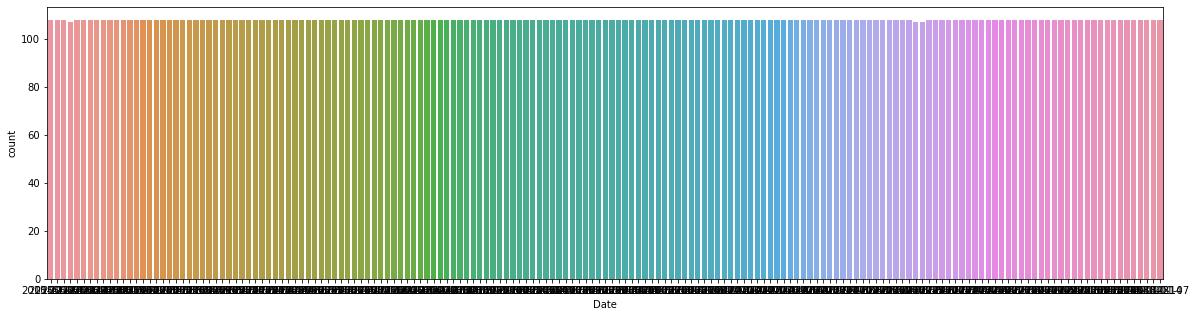

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(data['Date'])


Observation:
- Almost equal no. of samples are taken for each day whose data is present in dataset.    

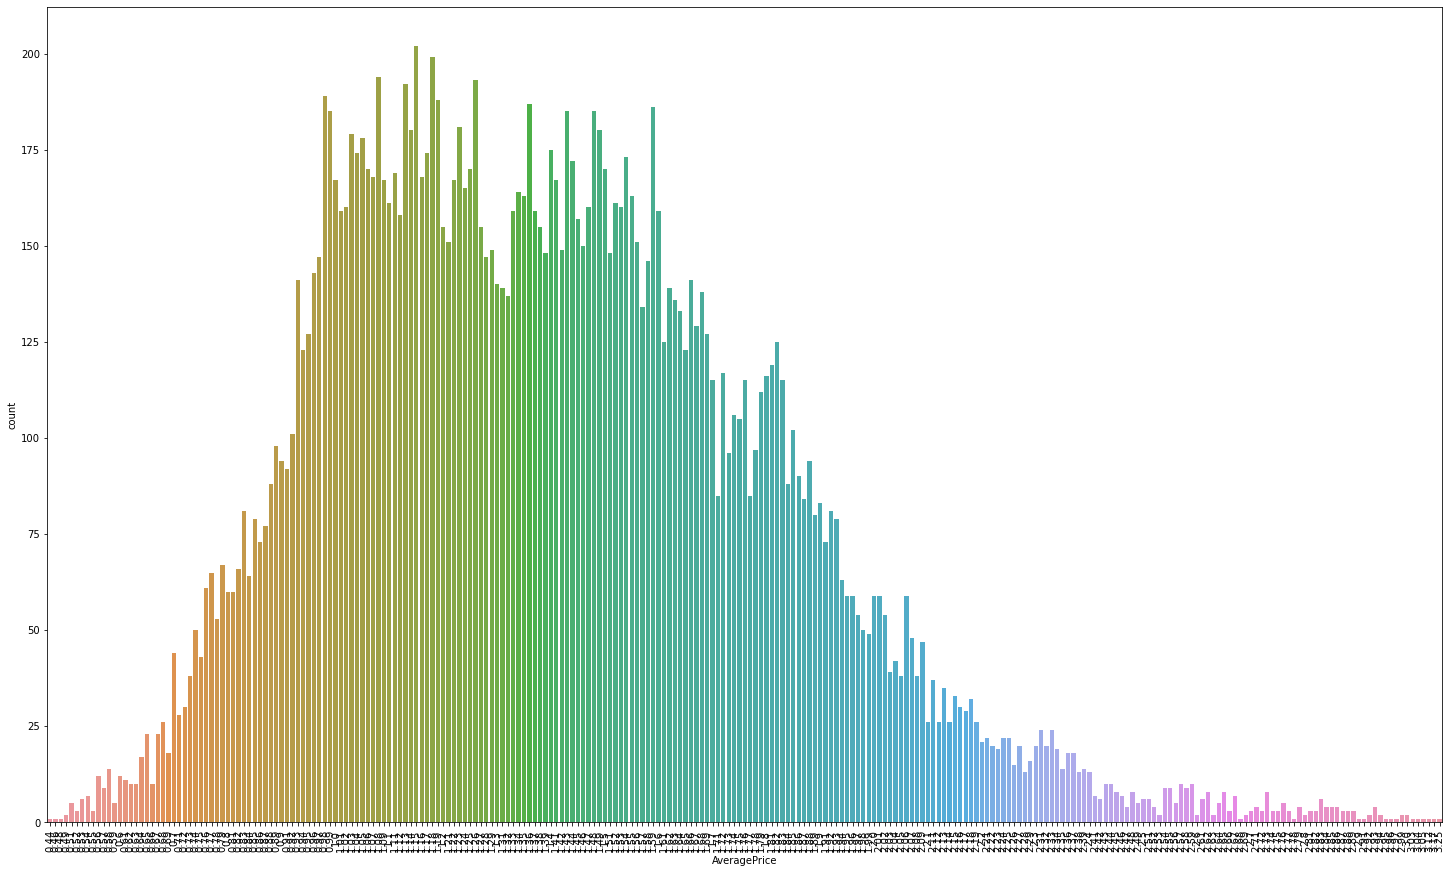

In [18]:
plt.figure(figsize=(25,15))
sns.countplot(data['AveragePrice'])
plt.xticks(rotation='vertical')
plt.show()

In [19]:
# checking for maximum price at which avocado is sold in retail.
data['AveragePrice'].max()

3.25

Observation from above plot and above output that gives the max.average price for avocado is sold is 3.25 dollars.Looking at the plot it can be seen that at this price highest number of avocados has benn sold.

In [20]:
#checking for minimum price at which avocado is sold in retails.
data['AveragePrice'].min()

0.44

Observation:
- this shows the lowest average amount of avocado that was sold in retails.    

In [21]:
#checking for data types using info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [22]:
data['Date']=pd.to_datetime(data['Date']) #converting date from string to datetime format

In [23]:
data['Date']=data['Date'].dt.month #converting my date values into month

In [24]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# ####################

In [25]:
#checking if Date column is converted to datetime format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  int64  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


**Note: It can be seen that the dataype for Date changed to integer as it has only month**

<AxesSubplot:xlabel='year', ylabel='count'>

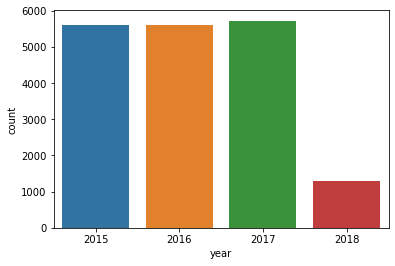

In [26]:
sns.countplot(data['year'])

**Observation :**
- looking at the plot it can be said that most number of observations are from 2017 whrein least numbers are from 2018.
- this observations can be invoices generated by each retailer for people after selling them avocadoes.so there can be two kinds of things that mighy have happened here:
- 1) The people took avocadoes in less number i.e. either 1 or 2 avocadoes per person, hence creating more invoices per person. This can be the reason if avocadoes were priced higher in that year
- 2) The people bought avocadoes in large numbers such as 6 or 12 or more avocadoes per person hence creating less invoices. This can be the reason if avocadoes were priced lower in that year.


In [27]:
#checking for value counts in type column 
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

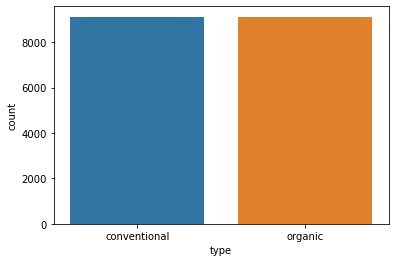

In [28]:
sns.countplot(data['type'])

**Observation for code and above plot:**
- By seeing at the plot it looks like equal number of avocado's were sold via conventional and organic farmimg and sold via retail markets.

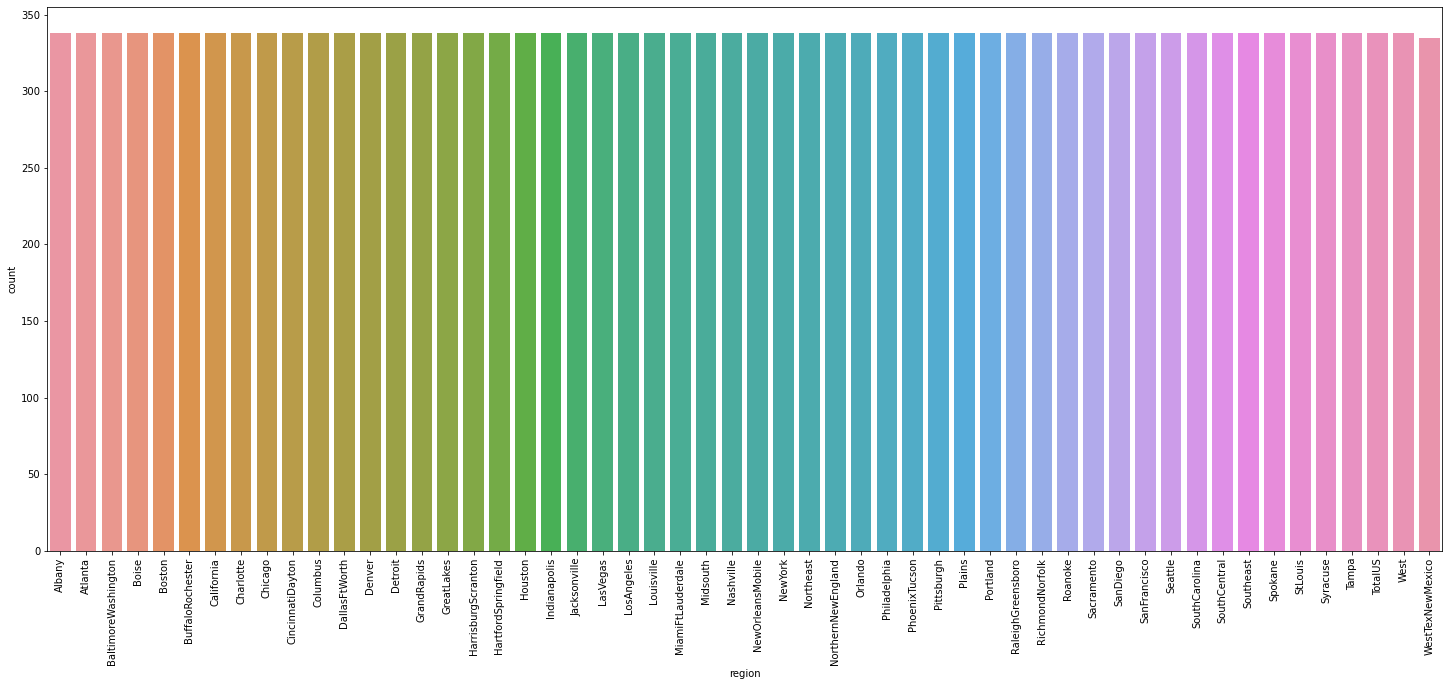

In [29]:
#plotting countplot for region columns to check the no. of observations from each region.
plt.figure(figsize=(25,10))
sns.countplot(data['region'])
plt.xticks(rotation='vertical')
plt.show()

Observation:
- Equal number of observation/cases taken from different regions that sold haas type avocadoes.

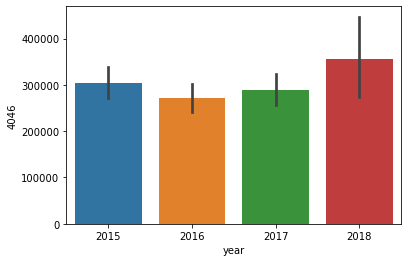

In [30]:
sns.barplot(x='year',y='4046',data=data)
plt.show()

# Note:
- In the swarmplot plotted above, it can be seen that in 2018 most number of avocadoes got sold with PLU 4046.
    

In [31]:
data.groupby('year')['4046'].mean()

year
2015    304443.451708
2016    271567.466578
2017    288716.905194
2018    355323.868904
Name: 4046, dtype: float64

**Observation:**
- In this above code it can be seen that in 2018 most number of avocadoes with PLU 4046 code got sold.
- It can be seen that in in 2016 this kind of avocadoes were sold in least number that is in average of 27000.    

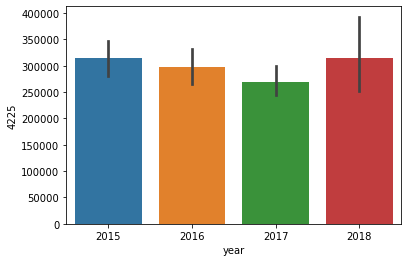

In [32]:
sns.barplot(x='year',y='4225',data=data)
plt.show()

In [33]:
data.groupby('year')[['4225']].mean()

,4225
year,
2015,313633.844367
2016,297850.478632
2017,269964.124350
2018,314628.606698


**Observations for plot and above code**
- It can be seen in years 2015 and 2018 almost same number of avocadoes were sold of PLU code 4225.
- Least number of PLU 4225 avacodes were sold in year 2017.

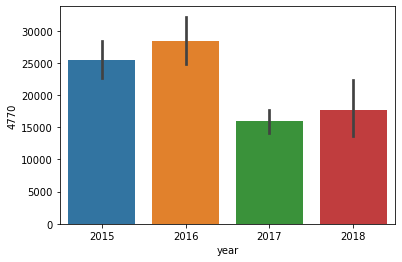

In [34]:
sns.barplot(x='year',y='4770',data=data)
plt.show()

In [35]:
data.groupby('year')[['4770']].mean()

,4770
year,
2015,25426.962520
2016,28468.633371
2017,15941.542779
2018,17694.903387


**Observations for plot and above code**
- highest number of avocadoes with PLU code 4770 were sold in 2016.
- Least number of PLU 4770 avocadoes were sold in 2017.

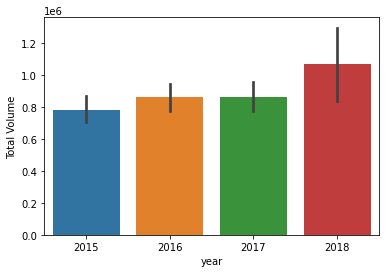

In [36]:
sns.barplot(x='year',y='Total Volume',data=data)
plt.show()

In [37]:
data.groupby('year')[['Total Volume']].mean()

,Total Volume
year,
2015,7.810274e+05
2016,8.584206e+05
2017,8.623393e+05
2018,1.066928e+06


**Observation for plot and above code:**
- It can be seen from above plot that in the year 2018 most number of avocadoes were sold.
- the least number of avocadoes were sold in 2015.

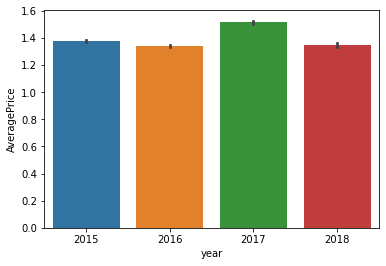

In [38]:
sns.barplot(x='year',y='AveragePrice',data=data)
plt.show()

Observation:
- It can be seen from above plot that the avocado prices were low in 2015, went down a little in 2016 and then sore up reaching highest in 2017.This can be inferred that as demand increased prices also increased reaching a threshold point which then dropped at it can be seen in 2018.
- In 2018 prices went down, this could be because more supply was there and more people bought avocadoes in bigger amounts.

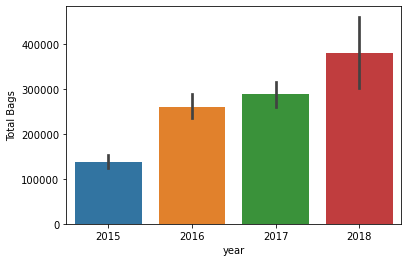

In [39]:
sns.barplot(x='year',y='Total Bags',data=data)
plt.show()

**Observation:**
- It can be seen from the above plot that least number of total avocado bags were sold in 2015 which kept on increasing with highest being in 2018.
- This plot is showing a positive trend i.e. sale increased with respect to increasing years.

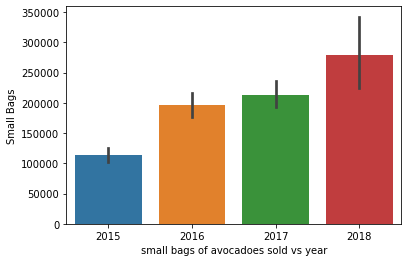

In [40]:
sns.barplot(x='year',y='Small Bags',data=data)
plt.xlabel('small bags of avocadoes sold vs year')
plt.show()

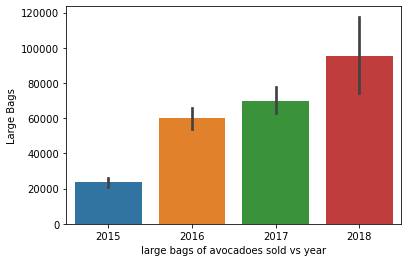

In [41]:
sns.barplot(x='year',y='Large Bags',data=data)
plt.xlabel('large bags of avocadoes sold vs year')
plt.show()

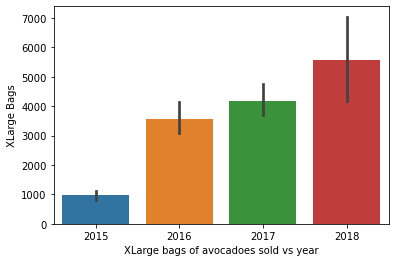

In [42]:
sns.barplot(x='year',y='XLarge Bags',data=data)
plt.xlabel('XLarge bags of avocadoes sold vs year')
plt.show()

**Observation for all 3 above plots for year vs small/large and Xlarge bags:**
- It can be seen from above three plots that the plots are showing positive trend i.e. quantity of all kinds of bags are increasing with increasing years.
- In case of Small bags, in 2015 it sold around approx.110000 avocado bags which is least compared to approx.270000 in 2018.
- In case of Large bags, in 2015 approx 22000 avocado bags were sold while in 2018 the count kept on increasing upto approx.95000 bags.
- In case of Xlarge bags, in 2015 only approx.1000 bags were sold which increased to approx. >5500 in 2018.

- If we compare all three graphs for type of bags, it can be seen that in 2015 though there were avocadoes available in ample quanitities but people didnt bought them so much as compared to 2018. 
- As I mentioned in previous observations, In 2015 people bought them in small quantities like in small bags hence the quantities of small bags is high.Only>= 1000 Xlarge bags were sold compared to 5500 bags in 2018


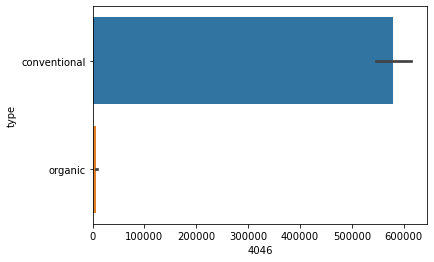

In [43]:
sns.barplot(x='4046',y='type',data=data)

plt.show()

**Observation:**
- It can be seen from above plot that quantity of avocadoes sold of PLU 4046 type is negligible compared to conventionally farmed avocadoes. This is because it is hard and time consuming to grow any fruit organically as no chemical are used during farming them.

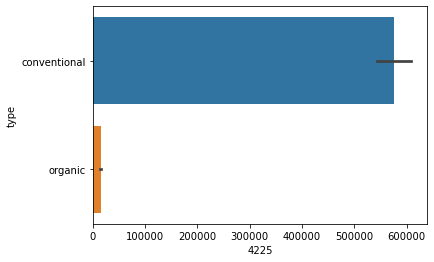

In [44]:
sns.barplot(x='4225',y='type',data=data)

plt.show()

**Observation:**
- In this case also i.e. PLU 4225 type avocadoes; organically farmed quantity are less compared to conventionaly farmed.But in this case organically farmed is more than that of PLU 4046 type avocadoes.    

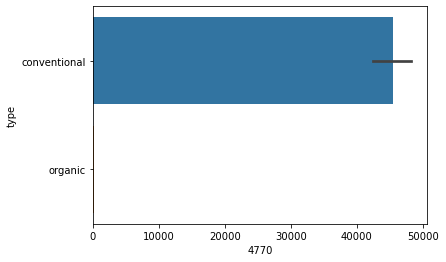

In [45]:
sns.barplot(x='4770',y='type',data=data)

plt.show()

In [46]:
data.groupby('type')[['4770']].mean()

,4770
type,
conventional,45405.796798
organic,266.254582


**Observaation:**
- It can be seen that very less number of organically farmed avocadoes were sold.
    

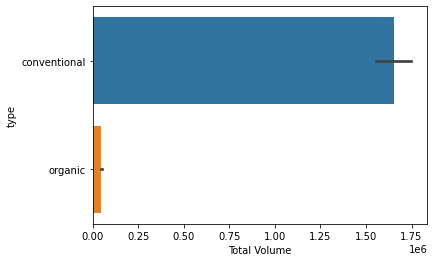

In [47]:
sns.barplot(x='Total Volume',y='type',data=data)
plt.show()

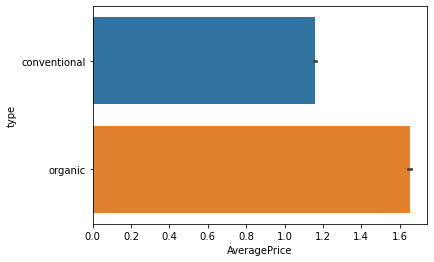

In [48]:
sns.barplot(x='AveragePrice',y='type',data=data)
plt.show()

**Observation for above 2 plots for year vs Average price and Total volume:**
- in 1st plot of Total volume wrt.type ,it can be seen that total volume of organically produced avocadoes is very low compared to cinventionally produced.
- It can be seen from the 2nd plot of Average price wrt.type that the prices of organically produced avocadoes is sold higher than conventional type avocadoes. 
- **The reason behind this is as seen in previous plots the quantity of organic avocadoes is very less and since people now moving into chemical-free diet, this might be the reason for increase in prices for organiclly produced avocadoes.**

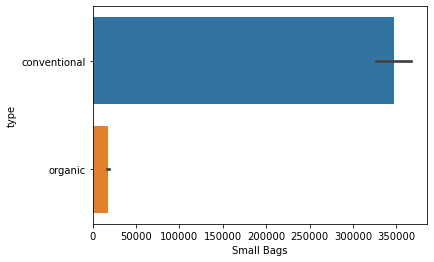

In [49]:
sns.barplot(x='Small Bags',y='type',data=data)
plt.show()

In [50]:
data.groupby('type')[['Small Bags']].mean()

,Small Bags
type,
conventional,346721.795885
organic,17613.474543


**Observation:**
- It can be seen from the above plot that very only 17613 small bags of organic avocadoes were sold in sopan of 4 years from 2015 to 2018.

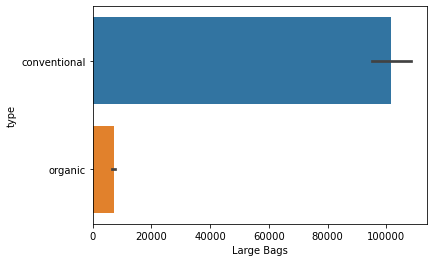

In [51]:
sns.barplot(x='Large Bags',y='type',data=data)
plt.show()

In [52]:
data.groupby('type')[['Large Bags']].mean()

,Large Bags
type,
conventional,101457.698855
organic,7202.982659


**Observation:**
- It can be seen from the plot and above code that only 7203 large bags of organic avocadoes were sold compared to 101457 large bags.  

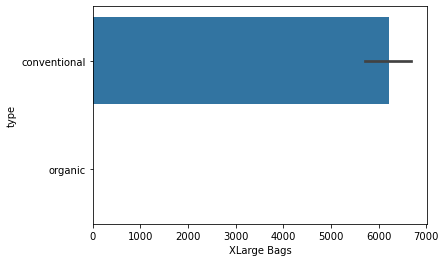

In [53]:
sns.barplot(x='XLarge Bags',y='type',data=data)
plt.show()

In [54]:
data.groupby('type')[['XLarge Bags']].mean()

,XLarge Bags
type,
conventional,6210.635065
organic,1.197164


**Observations:**
- It can be seen from plot and code that only 1 bag of Organic Xlarge avocadoes was sold in total span of 4 years compared to >6000 bags of conventionally produced avocadoes.

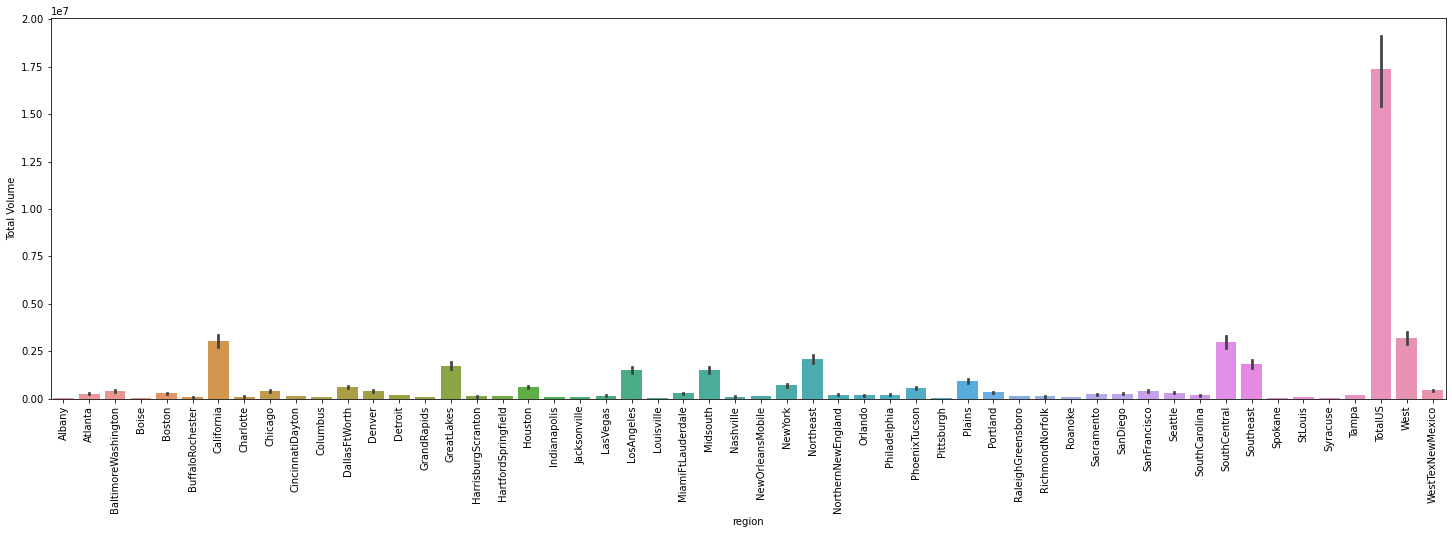

In [55]:
plt.figure(figsize=(25,7))
sns.barplot(x='region',y='Total Volume',data=data)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
(data.groupby('region')[['Total Volume']].mean())

,Total Volume
region,
Albany,4.753787e+04
Atlanta,2.621453e+05
BaltimoreWashington,3.985619e+05
Boise,4.264257e+04
Boston,2.877929e+05
BuffaloRochester,6.793630e+04
California,3.044324e+06
Charlotte,1.051939e+05
Chicago,3.955690e+05


**Observation for plot and code above:**
- region TotalUS is the biggest consumer of avocadoes, followed by West region and California.
- The region where avocadoes were least sold/consumed are from Syracuse.

In [57]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

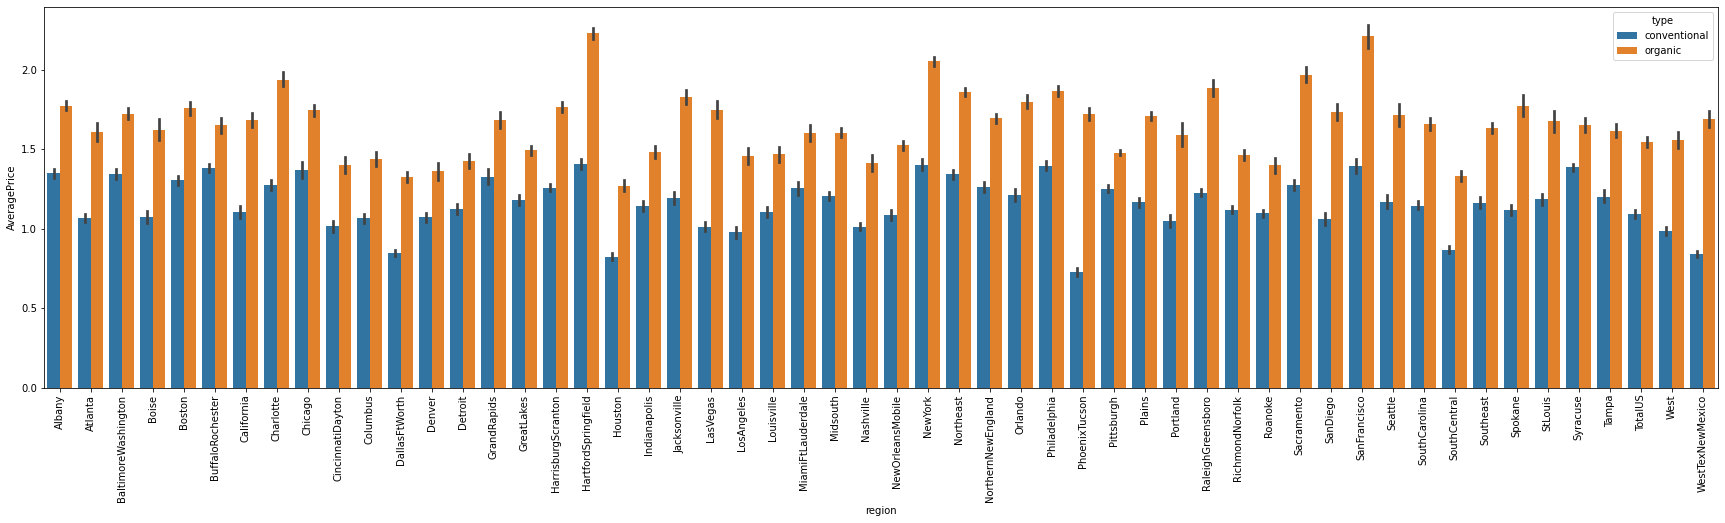

In [58]:
plt.figure(figsize=(30,7))
sns.barplot(x='region',y='AveragePrice',data=data,hue='type')
plt.xticks(rotation='vertical')
plt.show()

**Observation for above plot for region vs Average price with type of avocadoes as factor:**
- The above plot shows that the conventionally produced avocadoes were priced less compared to organic ones in all the regions.
- The regions HartfordSpringfield and SanFrancisco region people have paid most for both organic as well as conventionally produced avocadoes.In previous plots it is seen that in this 2 places there have no much retail sales as per TotalVolume data which implies that since the quantity of avocadoes was less in this region, prices increased so much making it highest from all other regions.
- PhoenixTuscon region sold conventional avocadoes at cheapest price compared to other regions while for organic avocadoes the prices were least in Houston region.

In [59]:
(data.groupby('region')[['Total Bags']].mean())

,Total Bags
region,
Albany,7.929747e+03
Atlanta,8.449856e+04
BaltimoreWashington,1.044561e+05
Boise,1.597459e+04
Boston,6.359609e+04
BuffaloRochester,3.435134e+04
California,7.298290e+05
Charlotte,3.460930e+04
Chicago,4.989763e+04


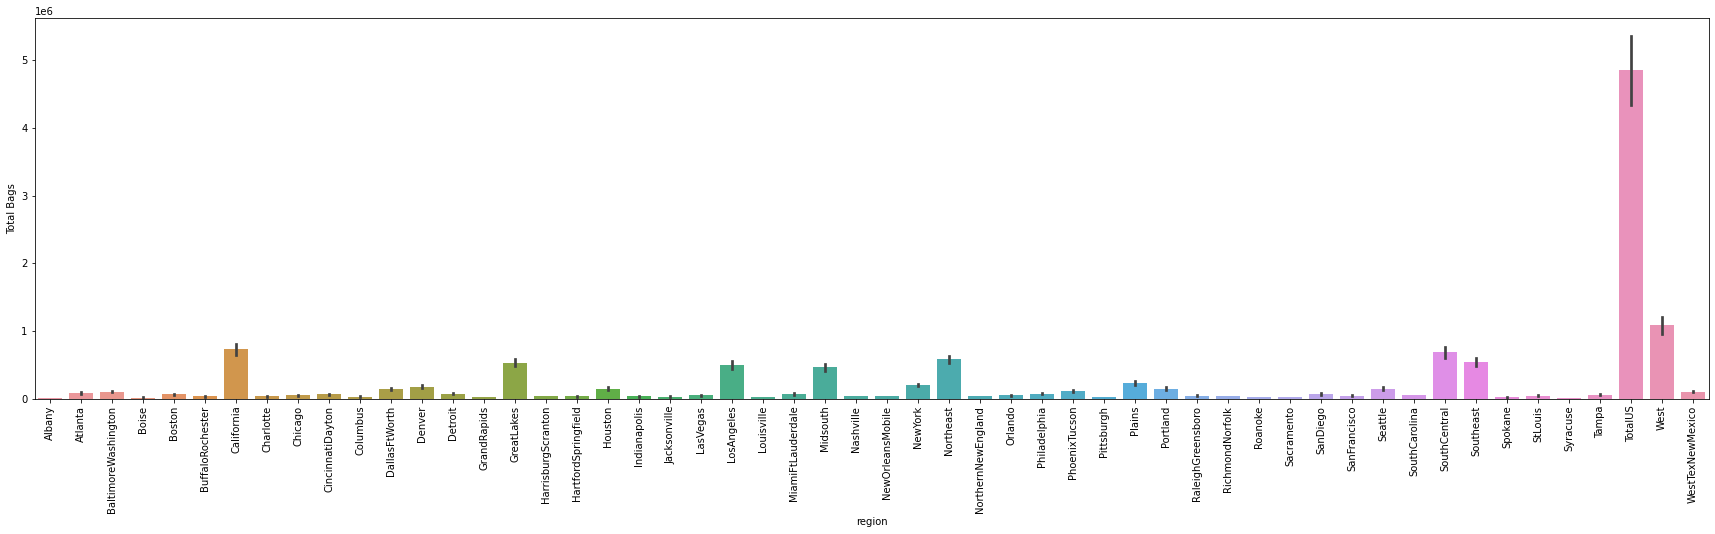

In [60]:
plt.figure(figsize=(30,7))
sns.barplot(x='region',y='Total Bags',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Observation:**
- The most number of Total bags of avocadoes were sold by TotalUS region follwed by West region.
- The least number of bags of avocadoes were sold in Albany region. 

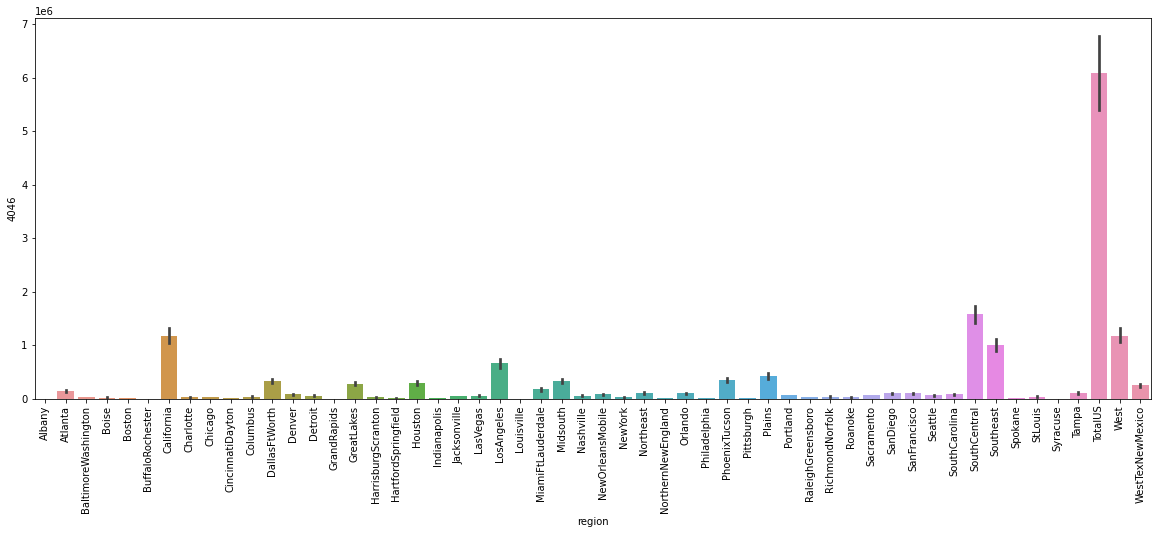

In [61]:
plt.figure(figsize=(20,7))
sns.barplot(x='region',y='4046',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Observations:**
- Looking at the plot above we can say that most of the avocadoes with PLU code 4046 have been sold in TotalUS region, followed by South Central region    

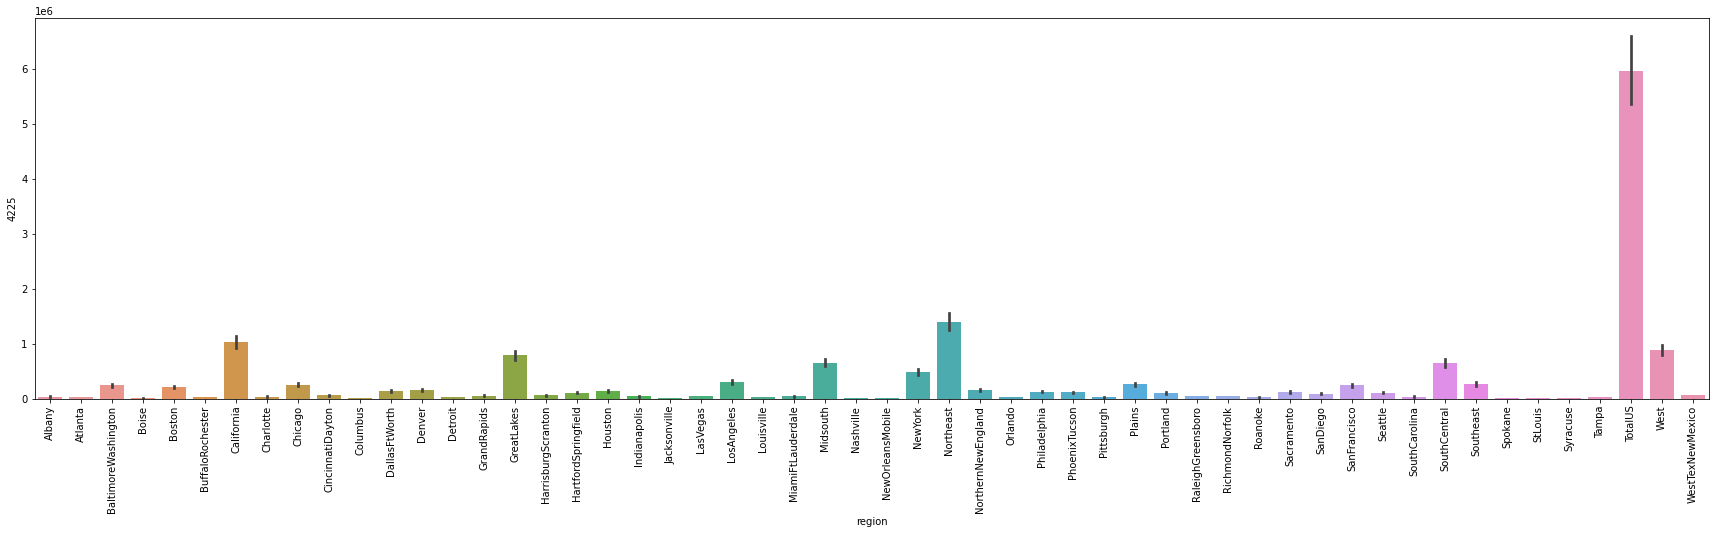

In [62]:
plt.figure(figsize=(30,7))
sns.barplot(x='region',y='4225',data=data)
plt.xticks(rotation='vertical')
plt.show()

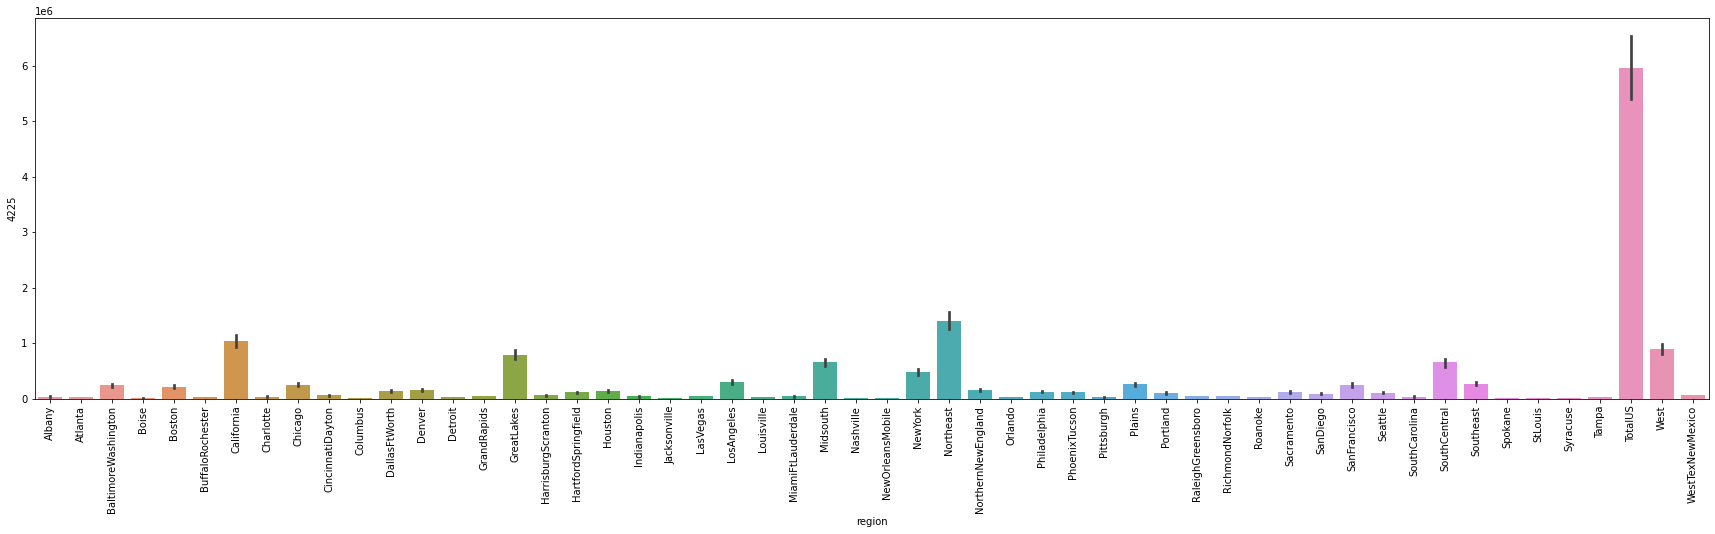

In [63]:
plt.figure(figsize=(30,7))
sns.barplot(x='region',y='4225',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Observations for region vs 4225 and region vs 4770 plots**
- It can be seen from the above plots that most 4770 and 4225 PLU coded avocadoes are sold in TotalUS region.

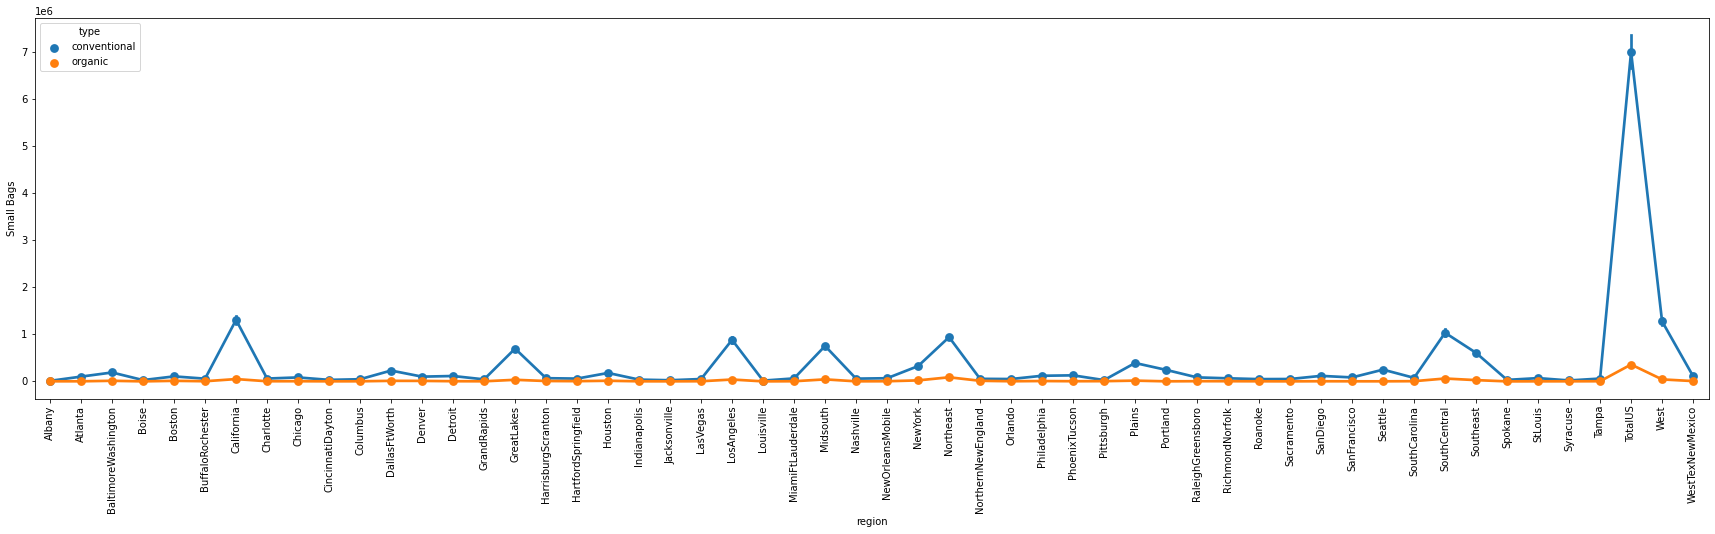

In [64]:
plt.figure(figsize=(30,7))
sns.pointplot(x='region',y='Small Bags',data=data,hue='type')
plt.xticks(rotation='vertical')
plt.show()

**Observation:**
- For conventional type:- It can be seen from the above plot that in TotalUS region most of the small bags were sold.Regions like California, GreatLakes,Los Angeles, Midsouth, Northeast, South central and West regions also had a fair share in selling small bags.
- For organic types, Total US sold more small bags compared to others.

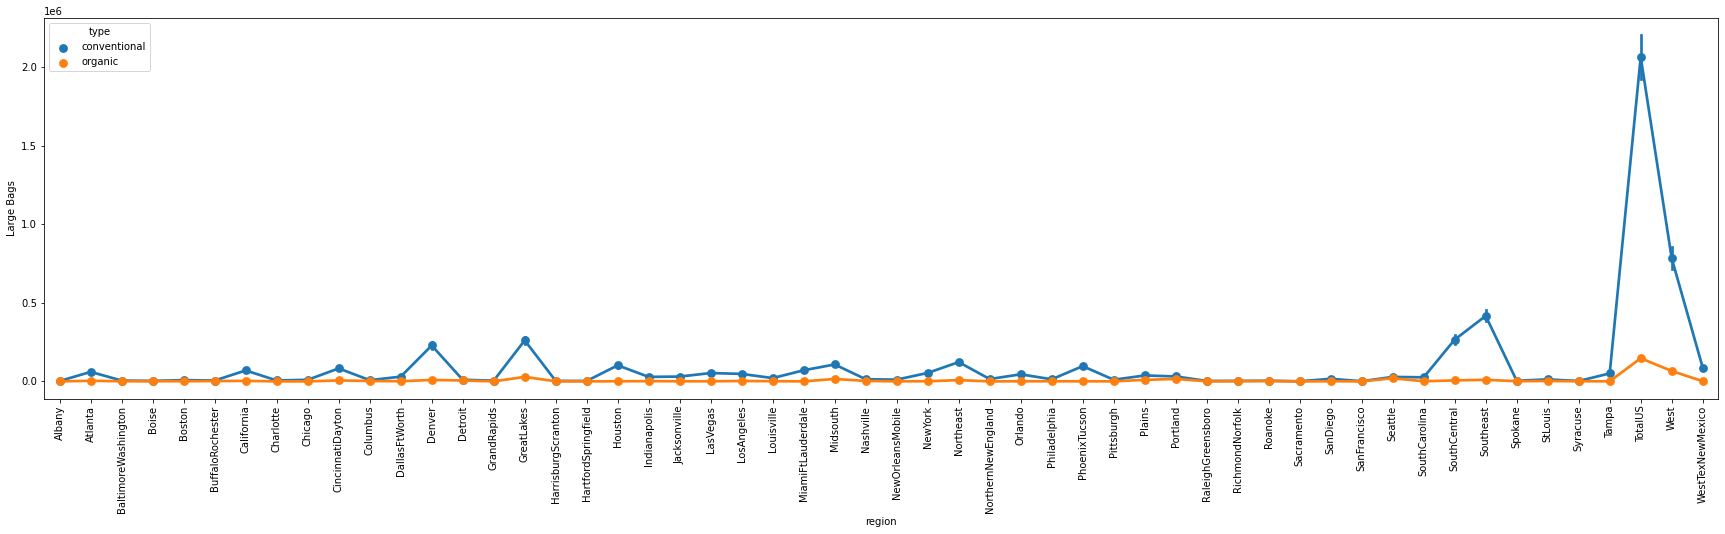

In [65]:
plt.figure(figsize=(30,7))
sns.pointplot(x='region',y='Large Bags',data=data,hue='type')
plt.xticks(rotation='vertical')
plt.show()

**Observation:**
- The above plot shows how many large bags are sold in this regions. Most large bags of avocadoes are sold in TotalUS region followed by west region for both type pf avocadoes.

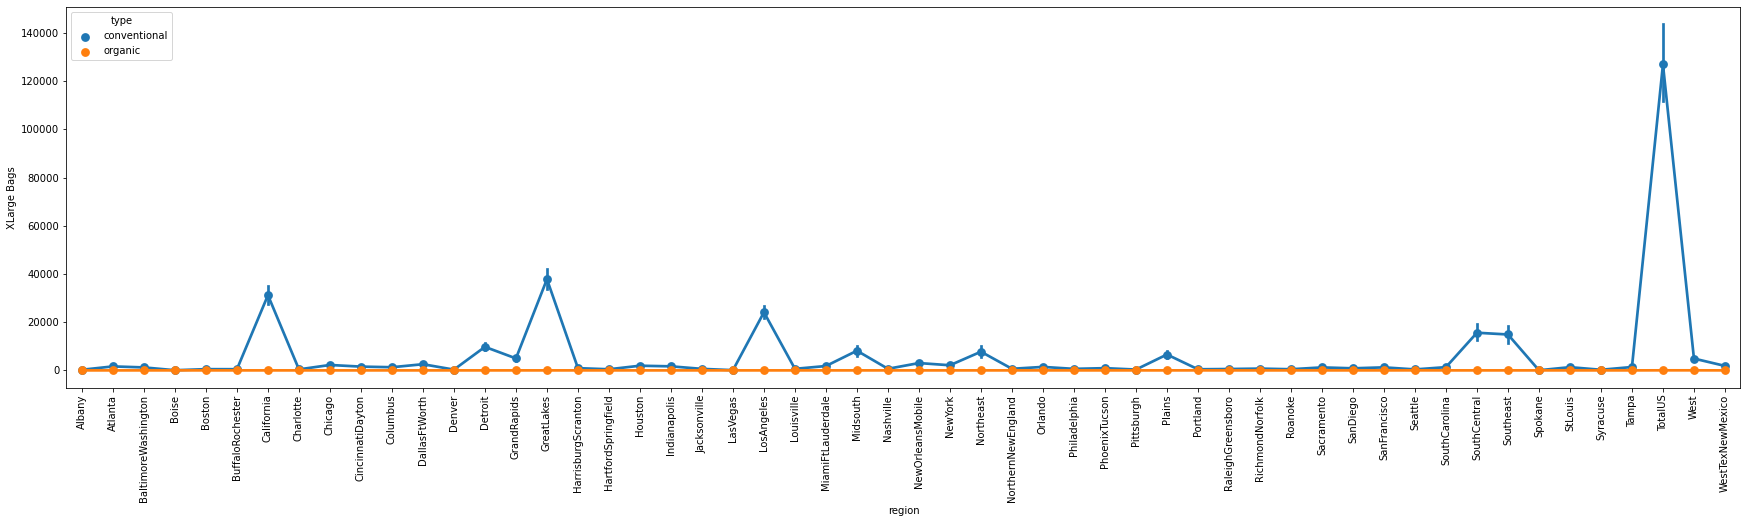

In [66]:
plt.figure(figsize=(30,7))
sns.pointplot(x='region',y='XLarge Bags',data=data,hue='type')
plt.xticks(rotation='vertical')
plt.show()

**Observation:**
- In above plot we can see that TotalUS region has the highest sale of Xlarge bags of avocadoes foloowed by GreatLakes and California.

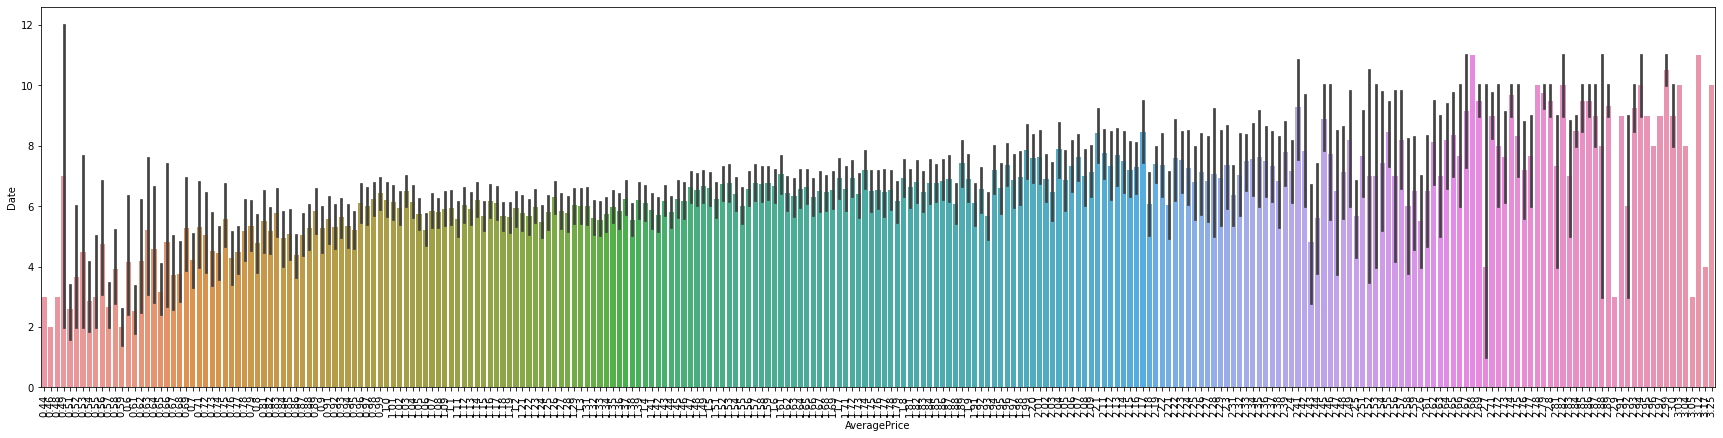

In [67]:
plt.figure(figsize=(30,7))
sns.barplot(x='AveragePrice',y='Date',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Observation:**
- The above plot shows that the price of the average price of avocado is increasing with increase in months showing that the price is less during january and february while the prices increases by october.

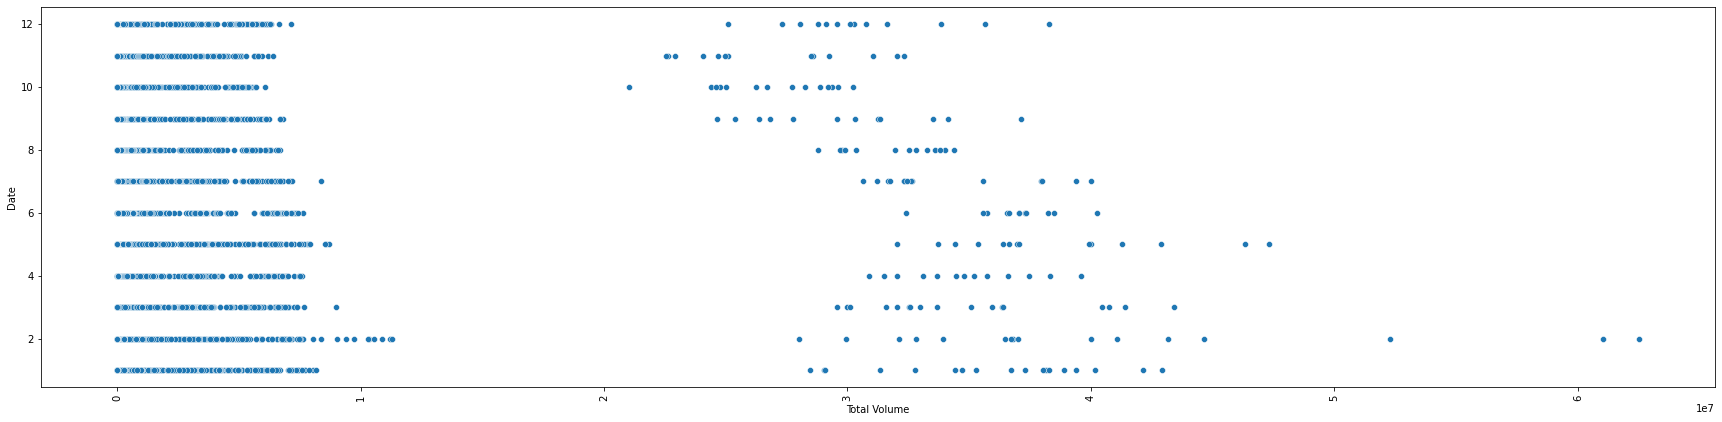

In [68]:
plt.figure(figsize=(30,7))
sns.scatterplot(x='Total Volume',y='Date',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Obserations:**
- It can be seen from the plot that the total volume is more in January month and low in October and starts increasing from November.

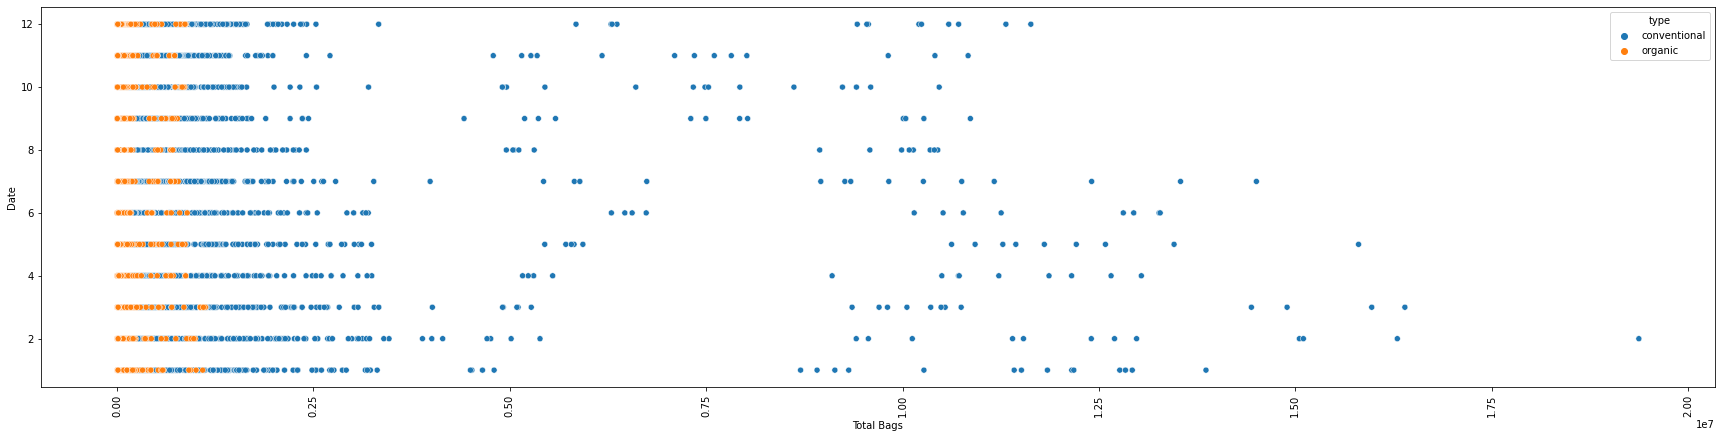

In [69]:
plt.figure(figsize=(30,7))
sns.scatterplot(x='Total Bags',y='Date',data=data,hue='type')
plt.xticks(rotation='vertical')
plt.show()

**Observations:**
- The sale of total bags of avocadoes is more in November to January time, which goes on decresing reching minima in October. This is applicable for both types of avocadoes i.e. conventional and organic.

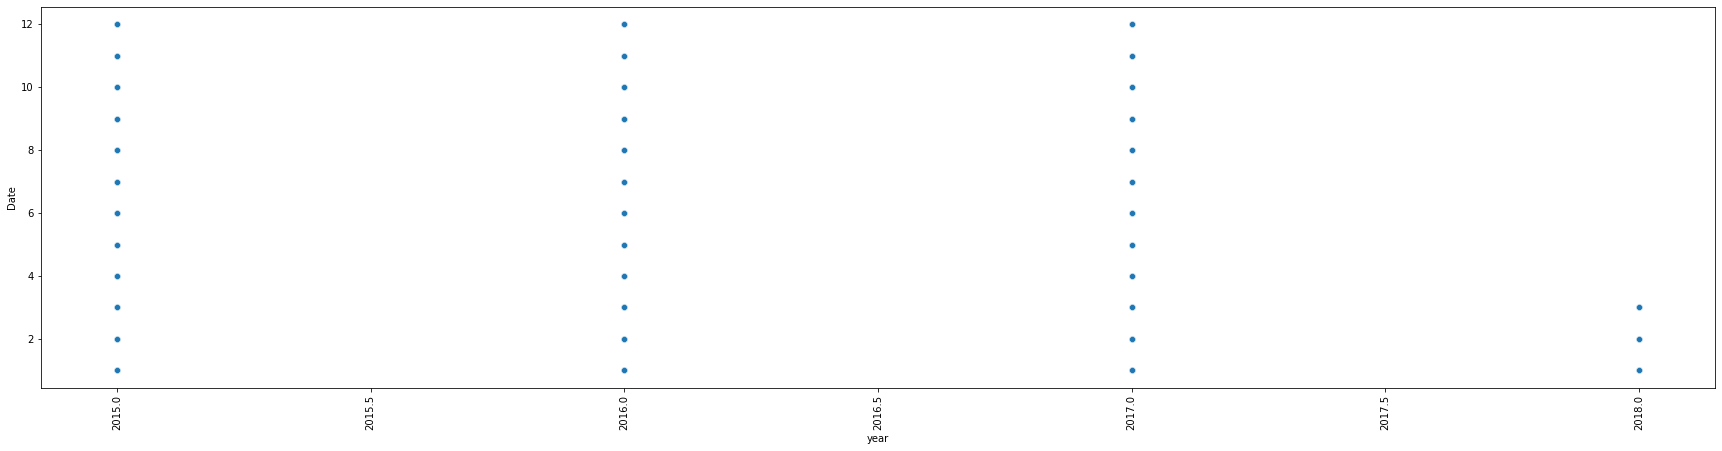

In [70]:
plt.figure(figsize=(30,7))
sns.scatterplot(x='year',y='Date',data=data)
plt.xticks(rotation='vertical')
plt.show()

**OBservations**
- The data accumulated for 2015,2016 and 2017 is all round the year, while the data collected or sales of avocadoes registered is for only 1st 3 months as seen in the plot.

**As I have noticed in this dataset that 1st column named "Unnamed: 0" is not important for the model building part as it consists of serial number/index numbers for for each region. 
  Hence this column will be dropped now.**

In [26]:
#dropping 'Unnamed:0' column
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**as seen above the column Unnamed:0 has been dropped.**

# **Encoding the type and region column using label encoder**

In [27]:
#importing library for Label Encoder
from sklearn.preprocessing import LabelEncoder

In [28]:
label_enc=LabelEncoder()

In [29]:
#applying label encoder to type and region columns
df1=label_enc.fit_transform(data['type'])
df2=label_enc.fit_transform(data['region'])

In [30]:
# saving and replacing the encoded data into original dataframe

data['type']=df1
data['region']=df2

In [31]:
#checking if data is encoded or not
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


**Region and Year column is encoded. Now all the dataset posess numerical values**

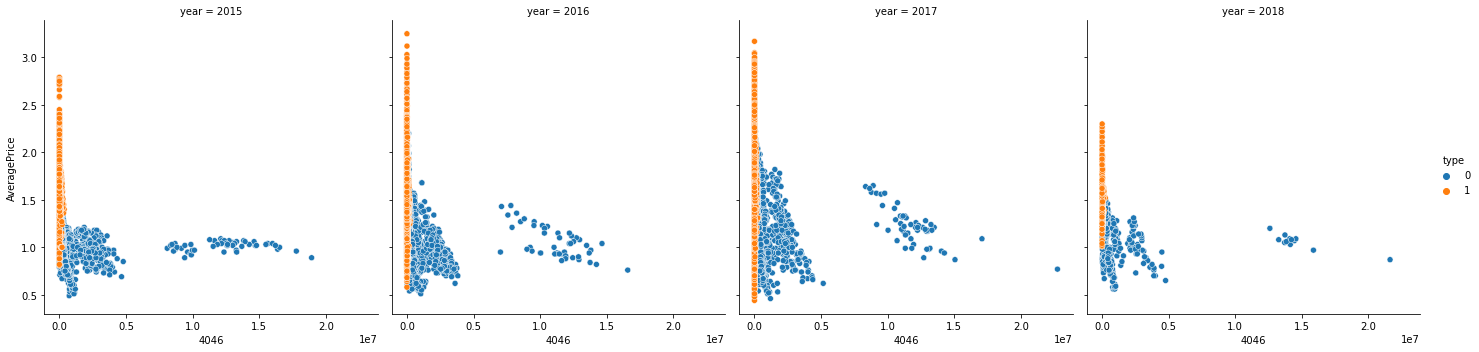

In [77]:
sns.relplot(x='4046',y='AveragePrice',data=data,hue='type',col='year')
plt.show()

**Observation: O stands for Conventional type and 1 stands for Organic type avocado**
- As seen in above plots, in all these years (2015-2018) organic avocado price are higher then conventional type avocadoes.
- in 2017 the starting price of organic type was approx.0.4 which increased in 2018 to 1 USD. The highest price was > 3.2 USD in 2017 but the max. price was decreased to only approx. 2.3USD.


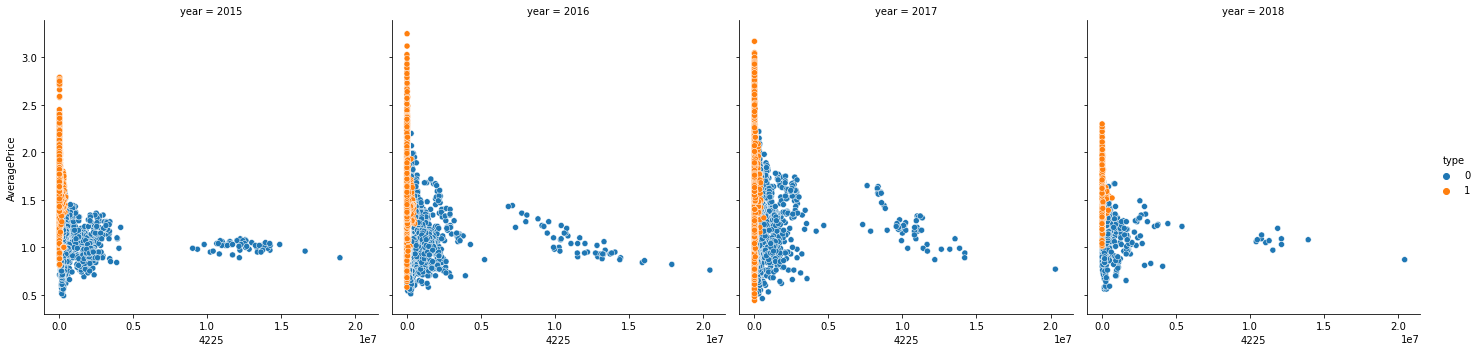

In [78]:
sns.relplot(x='4225',y='AveragePrice',data=data,hue='type',col='year')
plt.show()

**Observations:**
- In this case i.e. PLU 4225 type avocadoes; organic avocadoes are sold at higher prices in all 4 years.
- in 2017 the price of organic and conventional avocadoes were appriximately same in some regions as seen in plot.Also the prices for organic reached at max. high in same year.
- In 2018,the price of both type of avocadoes  dropped to certail limit as seen in plot.

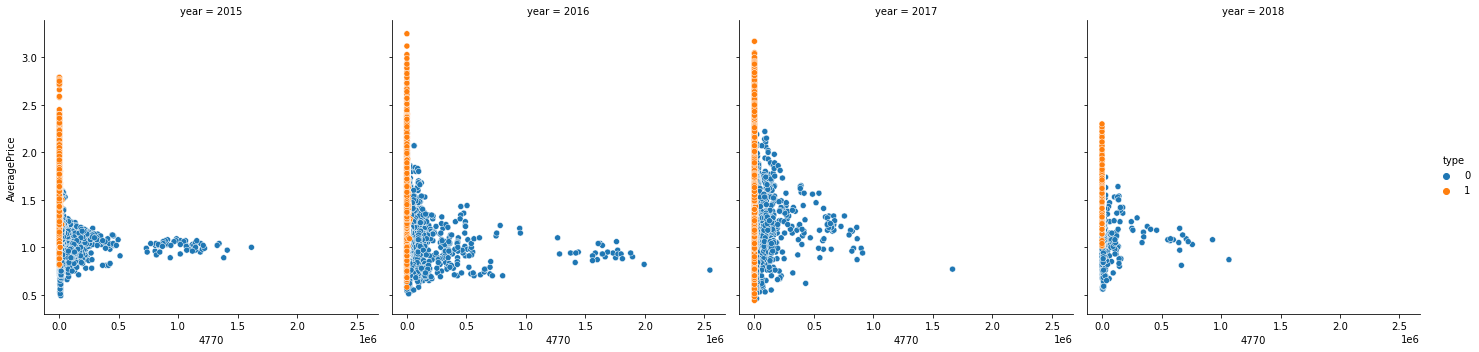

In [79]:
sns.relplot(x='4770',y='AveragePrice',data=data,hue='type',col='year')
plt.show()

**Observation:**.
- the average price of conventional avocadoes can is higher in 2017 compared to 2016; which went down in  2018.
- The prices of organic avocadoes is seen higher in all the years compared to conventional avocadoes.

In [80]:
data.groupby('type')[['4046','4225','4770']].mean()

,4046,4225,4770
type,,,
0,578611.649925,574805.318859,45405.796798
1,7311.281600,15411.857724,266.254582


**The output data shows the amount of avocadoes sold with respect to their PLU codes that were produced by organically or conventionally.**

**Observation:**
- It is seen that least number of PLU 4770 type avocadoes were sold in both types(organic/conventinal).
- it is interesting to see that maximum number of organic avocadoes sold are of PLU 4225 type.

In [81]:
data.groupby('year')[['4046','4225','4770']].mean()

,4046,4225,4770
year,,,
2015,304443.451708,313633.844367,25426.962520
2016,271567.466578,297850.478632,28468.633371
2017,288716.905194,269964.124350,15941.542779
2018,355323.868904,314628.606698,17694.903387


**The above output shows yearwise sales of different kind of avocadoes with reference to their PLU codes**

**Observation:**
-  The sale of PLU 4225 avocadoes is highest in year 2015 while that of PLU 4770 is least.
- In 2016 the sale of PLU 4770 avocadoes increased surpassing the sale of PLU 4046 avocadoes.
- In 2017 the sale of PLU 4770 avocadoes decreased in very high number with people opting to buy PLU 4046 avocadoes as shows in above table.
- In 2018 the sales of PLU 2018 to its record high in all 4 years surpassing all other type of avocadoes. while sale of PLU 4770 increased slightly.

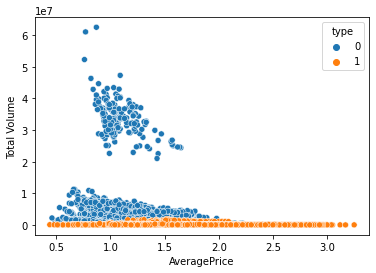

In [82]:
sns.scatterplot(x='AveragePrice',y='Total Volume',data=data,hue='type')

plt.show()

**Observation:**
- The above plot shows that in case of organic avocadoes, the price keeps on increasing even though the volume increasing or not.This is affrected regionwise as different regions sell with different prices.
- In case of conventional produced avocadoes, for some avocadoes the price keeps on increasing as the volume decrease but for some it increased but as volume increased prices started increases.

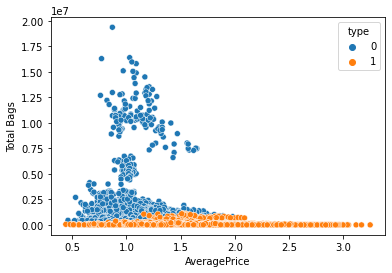

In [83]:
sns.scatterplot(x='AveragePrice',y='Total Bags',data=data,hue='type')

plt.show()

**Observation:**
- As seen in above plot as the sale of avocado bags increased the prices started increasing.


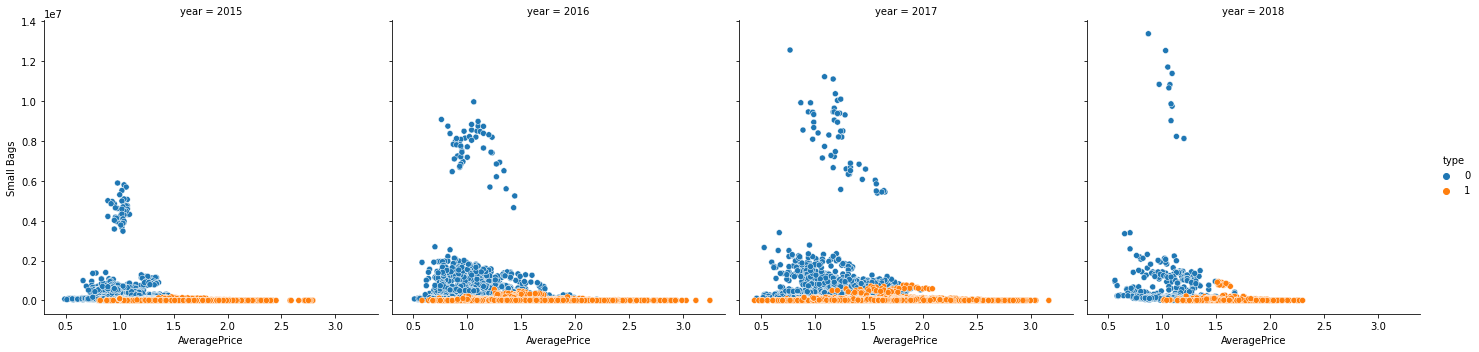

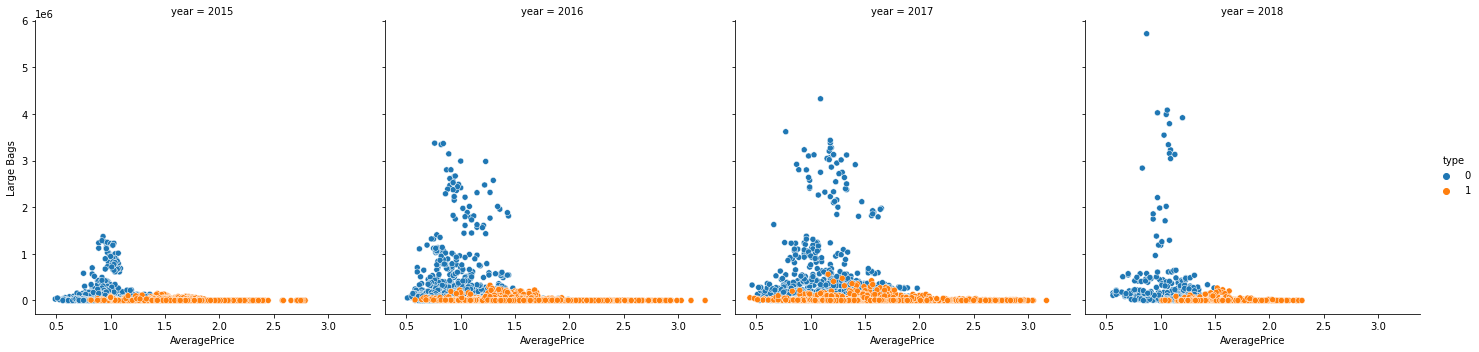

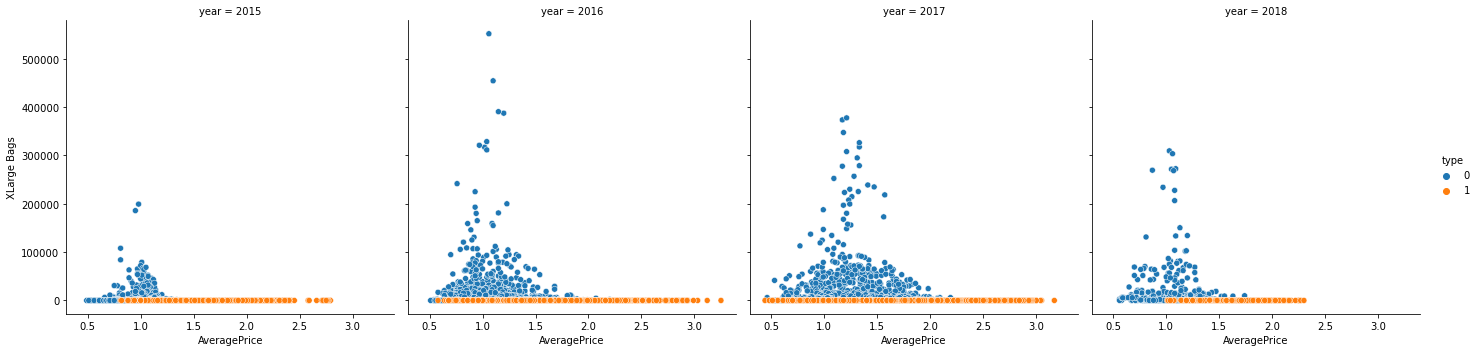

In [84]:
sns.relplot(x='AveragePrice',y='Small Bags',data=data,hue='type',col='year')
sns.relplot(x='AveragePrice',y='Large Bags',data=data,hue='type',col='year')
sns.relplot(x='AveragePrice',y='XLarge Bags',data=data,hue='type',col='year')
plt.show()

**The above plots shows yearwise sale of (row-wise) Small Bags,Large Bags and Xlarge Bags of avocadoes with respect to years mentioned**

**Observation:**
- In all the plots prices of organic avocadoes are higher.
- In all the cases average prices keeps on increasing as the sale increases and then suddenly prices starts decresing as more and more bags are sold.

# Since we need to perform machine learning models for 2 columns i.e. (1) region (2) Average price, Hence making a new dataframe with same colums that will be used to make 2nd model.

In [32]:
#making dataframe with same columns and values as original dataframe with name as df

df=pd.DataFrame(data,columns=['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'])

df.head() #printing dataframe


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


# Taking  region column as label.
# Taking dataframe named ''data'' to analyse and then building  ML model.

In [33]:
data.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,6.177215,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,3.534130,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,3.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,6.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,9.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,12.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


**Observation:**

- **Average Price:-** The min price paid by customers is 0.44USD while max. price paid is 3.25USD per avocado.The average price paid by customers in all the regions is 1.40 with a variation of +-0.40USD across all the regions.The difference in the quantiles is not same hence we can say that data is skewed which can be confirmed further.
- **Total Volume:-** The max. volume of avocadoes sold in a day is 6.250565e+07 and min is 8.540700e+02. The average total sale of avocadoes by volume was 8.506440e+05 with a variation in sales of 3.453545e+06. Looking at the quantiles it seems like data is skewed.
- **4046:-** This table shows that how many PLU 4046 type avocadoes sold in a day. The min sale per day is 0 while the max. sale per day is 2.274362e+07.The average sale across regions was 2.930084e+05 per day.
- **4225:-** This table shows that how many PLU 4225 type avocadoes sold in a day. The min sale per day is 0 while the max. sale per day is 2.047057e+07.The average sale across regions was 2.951546e+05 per day.
- **4770:-** This table shows that how many PLU 4770 type avocadoes sold in a day. The min sale per day is 0 while the max. sale per day is 2.546439e+06.The average sale across regions was 2.283974e+04 per day.
- **Total Bags:-** The min bags of avocadoes sold per day was 0 but max was 1.937313e+07 bags per day. The average number of total bags that were sold per day across all regions was 2.396392e+05.

- This dataset also shows outliers in small and Xlarge bags columns.

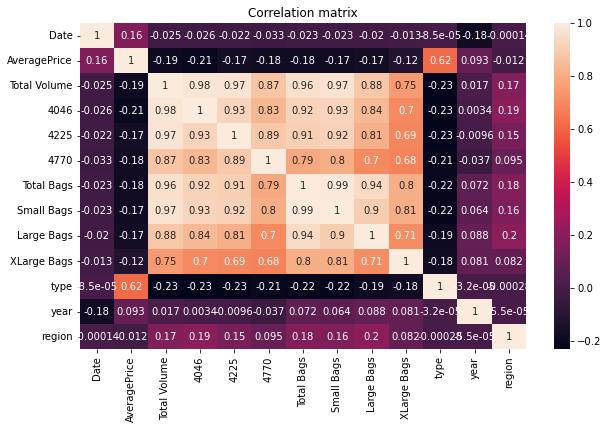

In [87]:
#finding correlation within dataset
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

**Observations:**
- **I take 75% as the minimum threshold to say that the features/labels has collinearity this means if a feature has correlation with >=75% then they are correlated and vice versa.**
 Many of the features shows multicollinearity as seen in heatmap.
- Total volume is positively correlated with 4046,4225,4770,Total bags, Small Bags
- 4046  is positively correlated with Total volume,4225,4770,Total bags, Small Bags ,Large bags.
- 4225  is positively correlated with Total volume,4046,4770,Total bags, Small Bags ,Large bags.
- 4770 is positively correlated with Total volume,4046,4225,Total bags, Small Bags.
- Total bags is positively related with Total volume,4046,4225,4770 and Small Bags.
- Small bags is positively related with Total volume,4046,4225,4770 and Total Bags.


**Plotting graphs that might/will confirm heatmap analysis.**

<AxesSubplot:xlabel='Total Volume', ylabel='4046'>

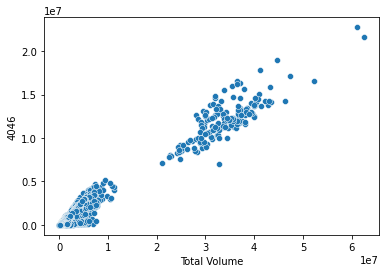

In [88]:
sns.scatterplot(x='Total Volume',y='4046',data=data)

**the plot shows a positive trend confirming the analysis from heatmap.**

<AxesSubplot:xlabel='Total Volume', ylabel='4225'>

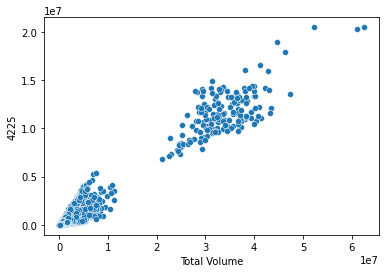

In [89]:
sns.scatterplot(x='Total Volume',y='4225',data=data)

The plot shows a positive relationship between Total Volume and PLU code 4225 type avocadoes.

<AxesSubplot:xlabel='Total Volume', ylabel='4770'>

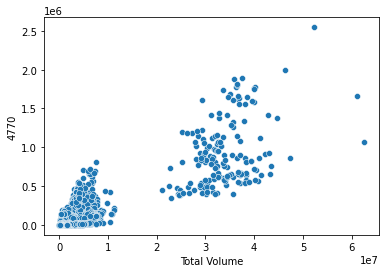

In [90]:
sns.scatterplot(x='Total Volume',y='4770',data=data)

**The plot shows a positive relationship between Total Volume and PLU code 4770 type avocadoes.**

<AxesSubplot:xlabel='Total Volume', ylabel='Small Bags'>

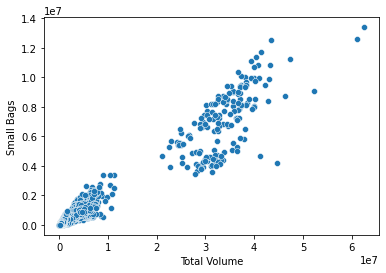

In [91]:
sns.scatterplot(x='Total Volume',y='Small Bags',data=data)

**The above plot shows a positive trend between small bags and total volume of avocadoes.**

<AxesSubplot:xlabel='Total Volume', ylabel='Large Bags'>

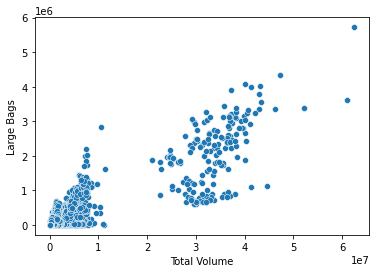

In [92]:
sns.scatterplot(x='Total Volume',y='Large Bags',data=data)

**The above plot shows a positive trend between Large bags and total volume of avocadoes.**

<AxesSubplot:xlabel='4046', ylabel='Large Bags'>

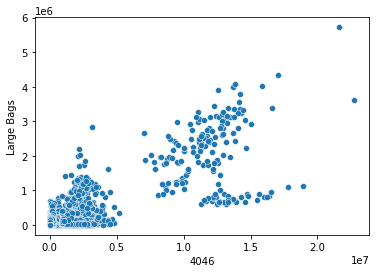

In [93]:
sns.scatterplot(x='4046',y='Large Bags',data=data)

The above plot shows a positive trend between large bags and total volume of avocadoes.

<AxesSubplot:xlabel='4046', ylabel='4225'>

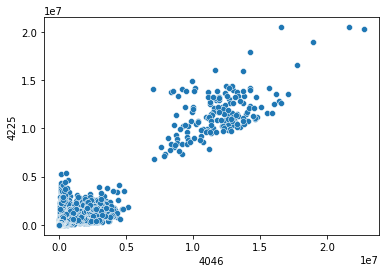

In [94]:
sns.scatterplot(x='4046',y='4225',data=data)

**The above plot shows a postive trend between PLU codes 4225 and 4046.**

<AxesSubplot:xlabel='4046', ylabel='4770'>

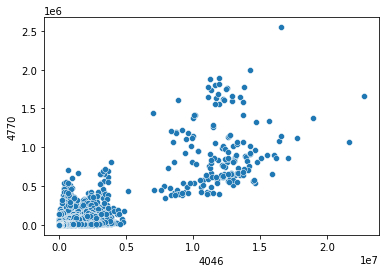

In [95]:
sns.scatterplot(x='4046',y='4770',data=data)

**The above plot shows positive trend between PLU code 4770 and 4046.**

<AxesSubplot:xlabel='4046', ylabel='Total Bags'>

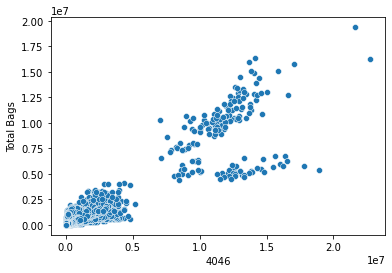

In [96]:
sns.scatterplot(x='4046',y='Total Bags',data=data) 

**the above plot shows positive trend between Total bags abd PLU code 4046.**

<AxesSubplot:xlabel='4046', ylabel='Small Bags'>

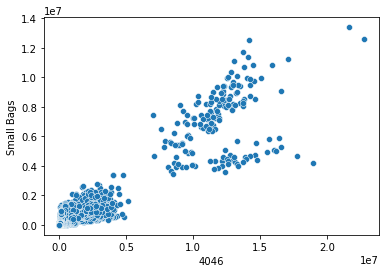

In [97]:
sns.scatterplot(x='4046',y='Small Bags',data=data)


**The above plot shows positive trend between Small Bags and PLU code 4046.**

<AxesSubplot:xlabel='4225', ylabel='Total Volume'>

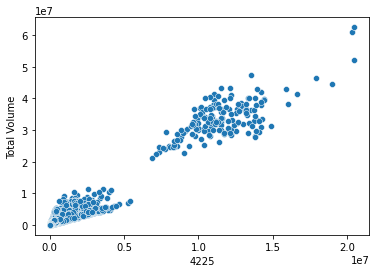

In [98]:
sns.scatterplot(x='4225',y='Total Volume',data=data)

**The above plot shows positive trend between Small Bags and PLU code 4046.**

<AxesSubplot:xlabel='4225', ylabel='Total Bags'>

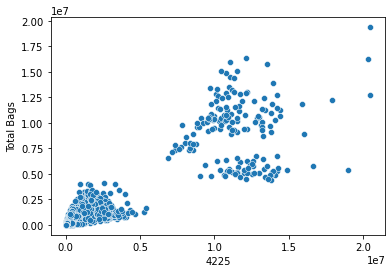

In [99]:
sns.scatterplot(x='4225',y='Total Bags',data=data)

**The above plot shows positive trend between Total bags of avocadoes and PLU code 4225.**

<AxesSubplot:xlabel='4225', ylabel='Small Bags'>

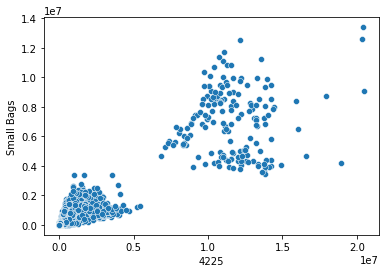

In [100]:
sns.scatterplot(x='4225',y='Small Bags',data=data)

**The above plot shows positive trend between Small bags and PLU code 4225.**

<AxesSubplot:xlabel='4225', ylabel='Large Bags'>

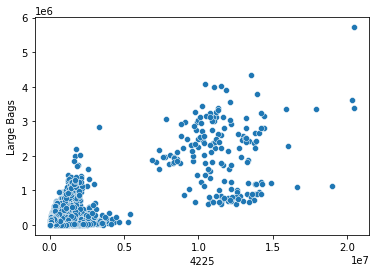

In [101]:
sns.scatterplot(x='4225',y='Large Bags',data=data)


**The above plot shows negative trend between Large Bags of avocadoes and PLU code 4225.**

<AxesSubplot:xlabel='4770', ylabel='Total Volume'>

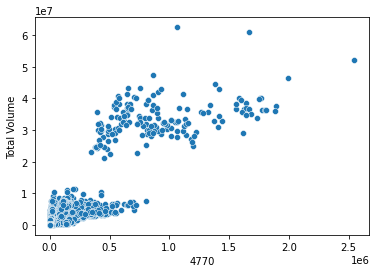

In [102]:
sns.scatterplot(x='4770',y='Total Volume',data=data)


**The above plot shows positive trend between Total volume and PLU code 4770.**

<AxesSubplot:xlabel='4770', ylabel='Total Bags'>

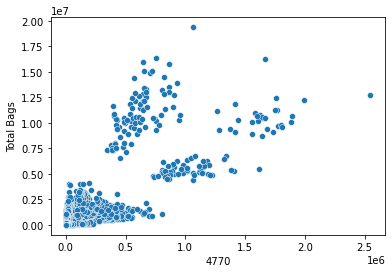

In [103]:
sns.scatterplot(x='4770',y='Total Bags',data=data)


**The above plot shows positive trend between Total bags and PLU code 4770.**

<AxesSubplot:xlabel='4770', ylabel='Small Bags'>

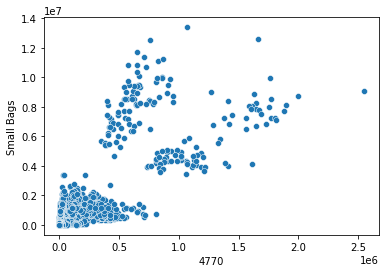

In [104]:
sns.scatterplot(x='4770',y='Small Bags',data=data)


**The above plot shows positive trend between small bags and PLU code 4770.**

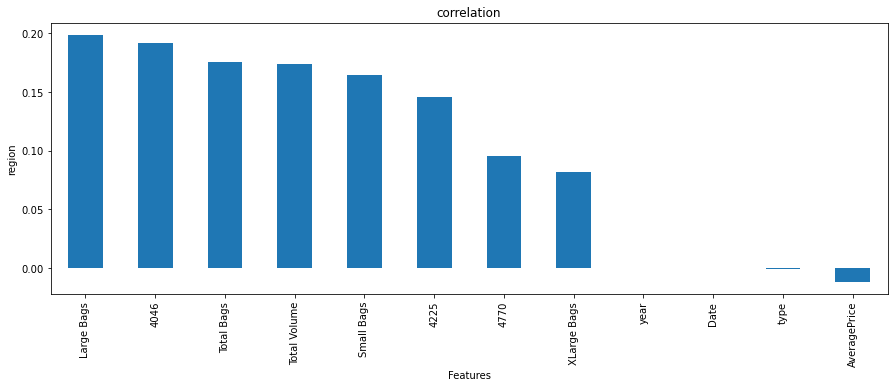

In [34]:
#plotting a coorelation plot that will show relation of features with label(region)

plt.figure(figsize=(15,5))
data.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('region')
plt.title('correlation')
plt.show()

**the above plot shows that large bags has highest positive relation with the label. The least postively related to label is year. Average price is negatively related to label.**

# Using feature selection method to find best features to build a model.

In [106]:
from sklearn.feature_selection import SelectPercentile,chi2

In [107]:
X=data.drop(['region'],axis=1)
Y=data['region']


In [108]:
Spercentile=SelectPercentile(score_func=chi2,percentile=80)
SPercentile=Spercentile.fit(X,Y)

In [109]:
#seperating the features to check for p values
cols= Spercentile.get_support(indices=True)
print('feature index=',cols)


features=X.columns[cols]
print('Features=',list(features))


feature index= [1 2 3 4 5 6 7 8 9]
Features= ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


In [110]:
data_scores=pd.DataFrame({'features':X.columns,'Chi2score':SPercentile.scores_,'pvalue':SPercentile.pvalues_})
data_scores.sort_values(by='Chi2score',ascending=False)

,features,Chi2score,pvalue
2,Total Volume,1.232416e+11,0.000000e+00
3,4046,4.609854e+10,0.000000e+00
4,4225,4.245149e+10,0.000000e+00
6,Total Bags,3.424210e+10,0.000000e+00
7,Small Bags,2.595946e+10,0.000000e+00
8,Large Bags,8.513930e+09,0.000000e+00
5,4770,3.481693e+09,0.000000e+00
9,XLarge Bags,4.859171e+08,0.000000e+00
1,AveragePrice,3.538246e+02,4.538034e-46
0,Date,1.418034e-02,1.000000e+00


# As per feature selection method; date,type and year has highest p values compared to other columns hence this 3 columns will be dropped.

In [111]:
data=data.drop(['Date','type','year'],axis=1)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


**Checking for skewness in dataset**

In [112]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
region           0.000030
dtype: float64

From the output it can be seen that all the continuous colums have skewness.

In [113]:
#making list of continuous columns
features=['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

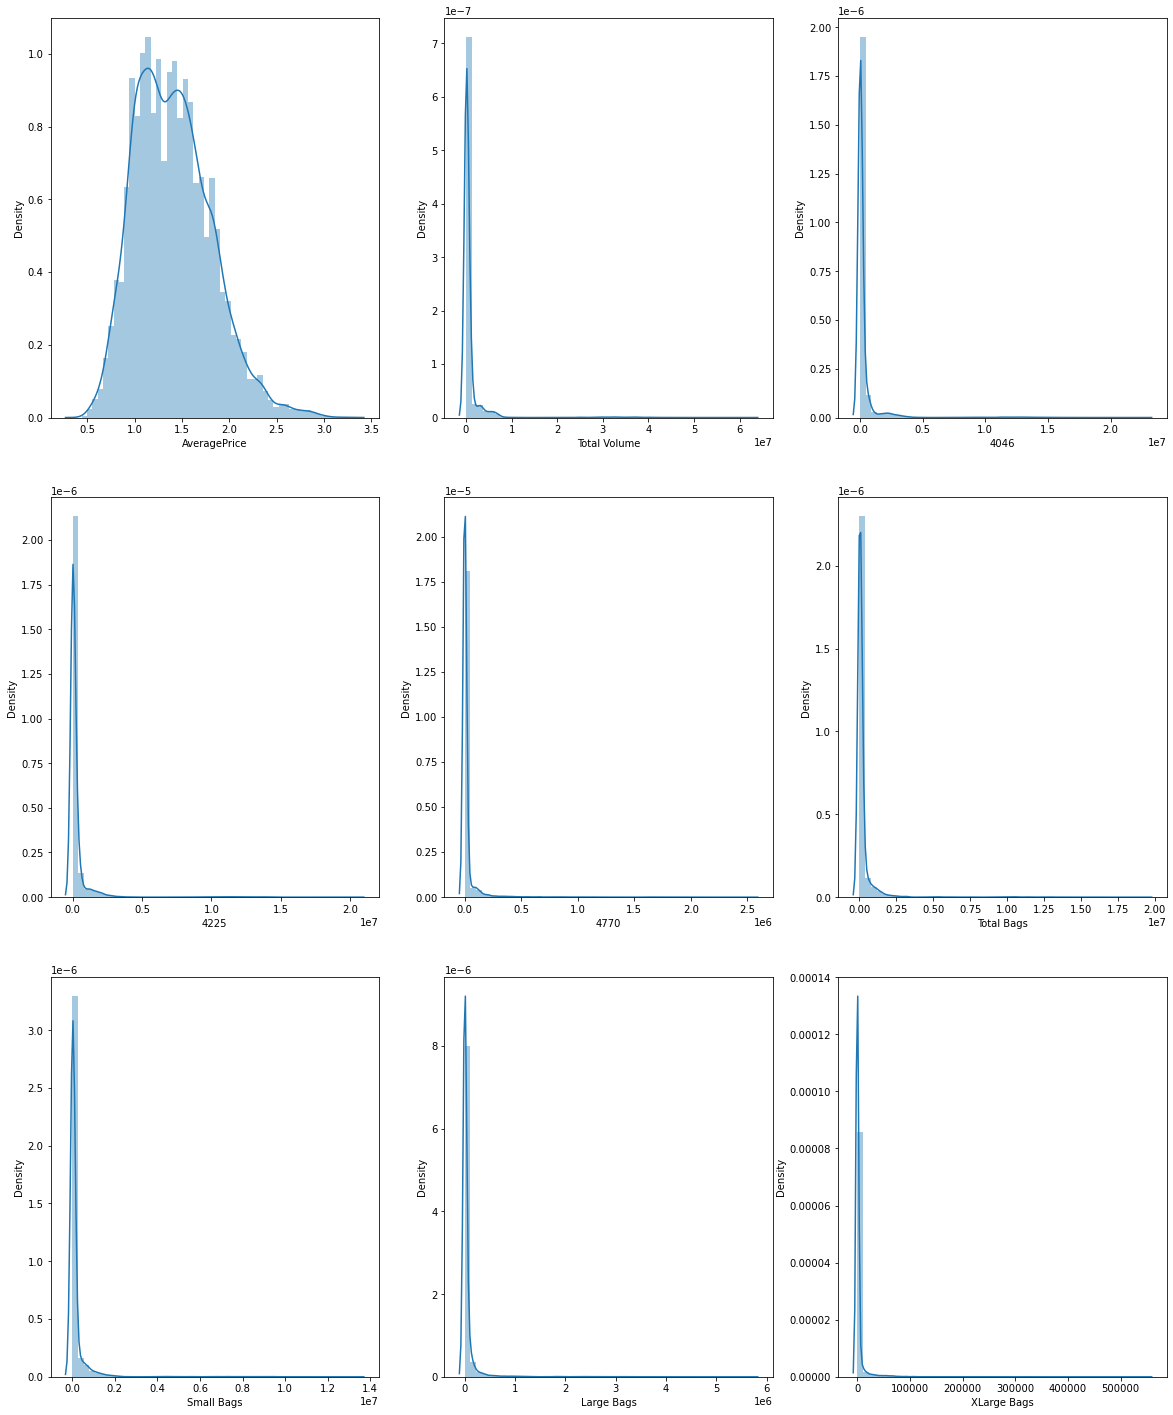

In [114]:
#plotting distplot to check for skewness
plt.figure(figsize=(20,25))
plotnumber=1

for column in features:
    if plotnumber<= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

**skewness can be seen in above plots for all the columns, hence removing skewness using power transformer method.**

In [115]:
#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson')

In [116]:
data[features]=scaler.fit_transform(data[features])

In [117]:
#checking for skewness after power transforming

data.skew()

AveragePrice    0.005596
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
region          0.000030
dtype: float64

In [118]:
data.shape

(18249, 10)

# checking for outliers in dataset

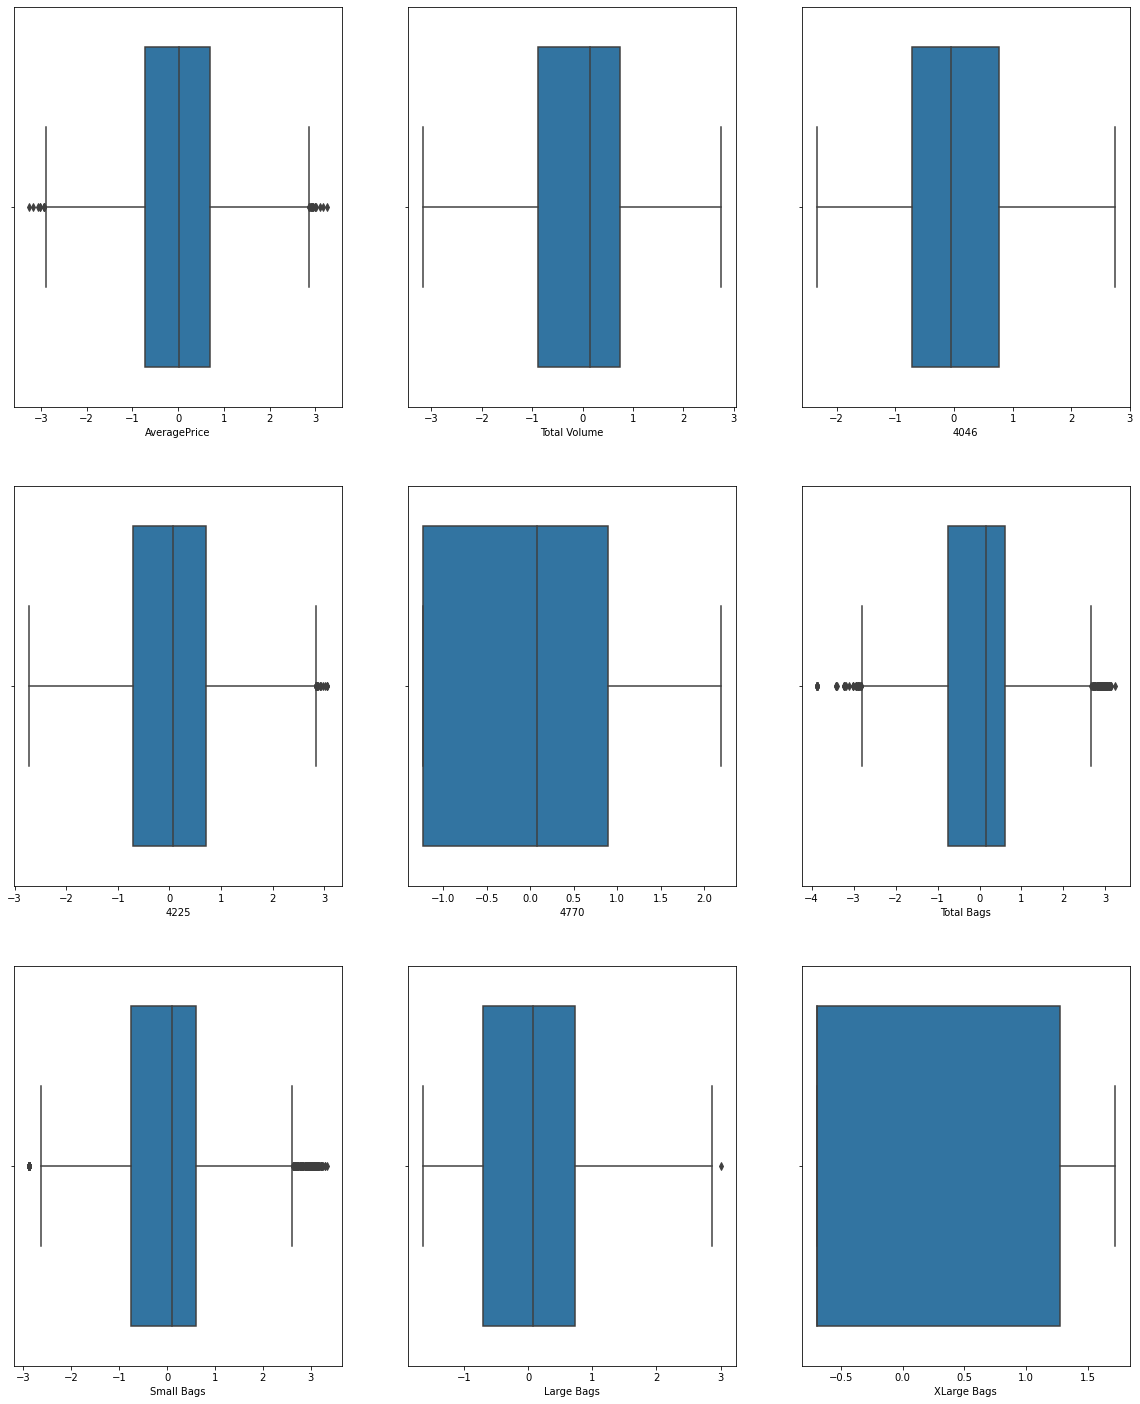

In [119]:
#plotting boxplots for dataset to check for outliers

plt.figure(figsize=(20,25))
plotnumber=1

for column in features:
    if plotnumber<= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

**It can be seen that there are outliers in many columns hence removing them below.**

# Removal of outliers using z-score method

In [120]:
from scipy.stats import zscore

In [121]:
z_score=zscore(data[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])

In [122]:
abs_z_score=np.abs(z_score)

In [123]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [124]:
data=data[filtering_entry]

In [125]:
data.shape

(18141, 10)

# Data loss after removing outliers

In [126]:
# data loss percentage 
data_loss=((18249-18141)/18249)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 0.5918132500410981%


**plotting boxplots after removing outliers**

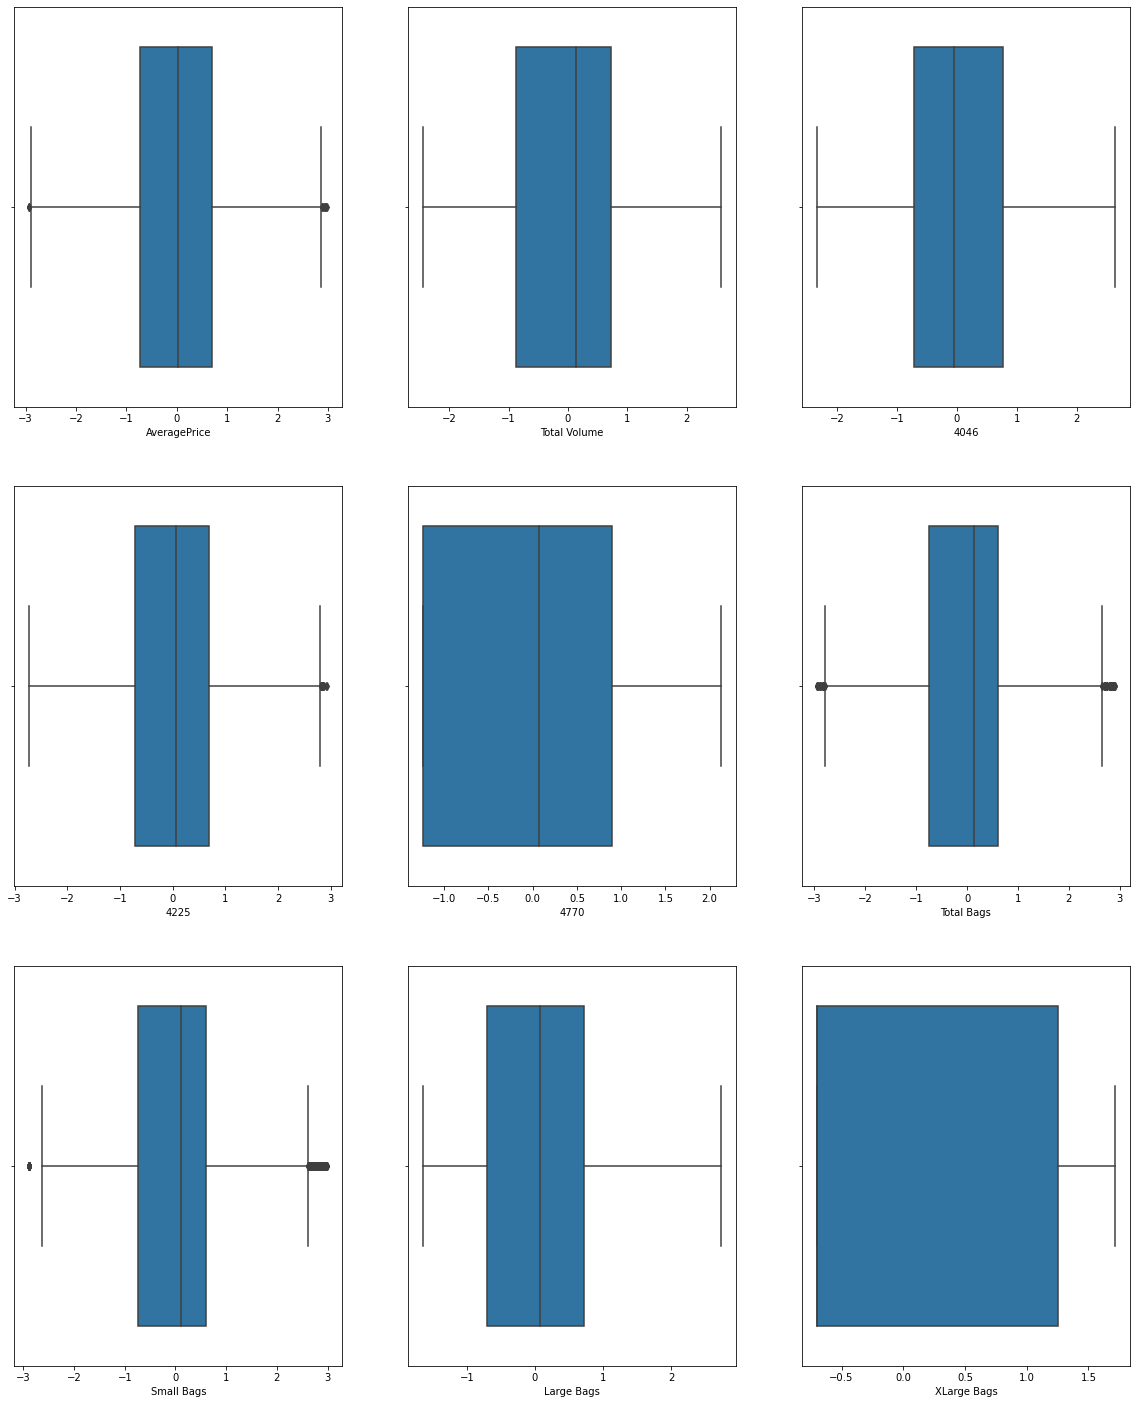

In [127]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in features:
    if plotnumber<= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

**Above plots shows no presence of outliers. All the data points are within range of +- 3.**

# Model Building

**Using power transformer technique scales/normalises that data that is being transformed. Since all the features are already scaled, there is no need to use Standard Scaler.** 

**Hence Standard Scaler preprocessing step to normalize/scaling the data will not be performed**

# Splitting data into features and label

In [128]:
x=data.drop(['region'],axis=1)
y=data['region']

In [129]:
#features
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849
...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849


In [130]:
#label
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18141, dtype: int32

In [131]:
#cjecking is data is balanced or not
y.value_counts()

0     338
35    338
25    338
26    338
28    338
29    338
30    338
31    338
32    338
34    338
38    338
22    338
39    338
40    338
41    338
44    338
45    338
46    338
49    338
52    338
23    338
27    338
21    338
12    338
2     338
4     338
5     338
6     338
7     338
8     338
20    338
11    338
10    338
15    338
16    338
17    338
18    338
19    338
48    337
14    337
36    337
37    337
50    337
13    337
1     337
3     337
33    336
24    336
43    336
9     336
53    335
47    332
42    320
51    270
Name: region, dtype: int64

**The data is balanced enough to go ahead with model building**

In [132]:
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
#saving model in variable
rf=RandomForestClassifier()

In [135]:
#finding best random state for LogisticRegression model
#finding best random state for model
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_train)
    pred=rf.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training accuracy is  100.0  for random state  0
testing accuracy is  87.54409171075838  for random state  0


training accuracy is  100.0  for random state  1
testing accuracy is  89.30776014109347  for random state  1


training accuracy is  100.0  for random state  2
testing accuracy is  88.77865961199295  for random state  2


training accuracy is  100.0  for random state  3
testing accuracy is  88.40388007054673  for random state  3


training accuracy is  100.0  for random state  4
testing accuracy is  88.09523809523809  for random state  4


training accuracy is  100.0  for random state  5
testing accuracy is  88.8668430335097  for random state  5


training accuracy is  100.0  for random state  6
testing accuracy is  88.93298059964727  for random state  6


training accuracy is  100.0  for random state  7
testing accuracy is  89.37389770723104  for random state  7


training accuracy is  100.0  for random state  8
testing accuracy is  89.10934744268077  for random state  8


tr

**taking random state as 35 for building machine learning models**

In [136]:
#initiating train test split thereafter model training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=35)

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))
        print('F1 Score ',f1_score(y_test,pred,average='micro'))

In [137]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [138]:
#passing the function
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:89.79%
classification report 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       101
           1       0.79      0.86      0.83        74
           2       0.96      1.00      0.98        90
           3       0.84      0.84      0.84        95
           4       0.93      0.92      0.93        89
           5       0.78      0.82      0.80        82
           6       0.97      0.95      0.96        76
           7       0.93      0.96      0.95        83
           8       0.99      0.93      0.96        89
           9       0.98      0.87      0.92        98
          10       0.80      0.88      0.84        76
          11       0.93      0.92      0.92        83
          12       0.99      0.93      0.96        76
          13       0.84      0.86      0.85        92
          14       0.82      0.86      0.84        86
          15     

**Finding cross validation score**

In [139]:
#importing library for cross validation score
from sklearn.model_selection import cross_val_score

In [140]:
#finding best value for cv in provided range
for i in range(30,40):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 30
cross validation score:-  82.26435334683377
At cv:- 31
cross validation score:-  82.21594582158276
At cv:- 32
cross validation score:-  82.36512688441428
At cv:- 33
cross validation score:-  82.94276094276096
At cv:- 34
cross validation score:-  83.45872151588463
At cv:- 35
cross validation score:-  83.21153051128279
At cv:- 36
cross validation score:-  83.0267622659107
At cv:- 37
cross validation score:-  83.3493899568965
At cv:- 38
cross validation score:-  83.8887203799346
At cv:- 39
cross validation score:-  83.84118396717042


In [141]:
#cross validation score
print('Cross Validation Score for Random Forest classifier model :- ',((cross_val_score(rf,x,y,cv=39).mean())*100))

Cross Validation Score for Random Forest classifier model :-  83.81368397012864


# Gradient Boosting Classifier

In [148]:
from sklearn.ensemble import GradientBoostingClassifier 

In [149]:
gbdt=GradientBoostingClassifier()

In [150]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [151]:
#passing the function
metric_score(gbdt,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(gbdt,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:97.99%
-----Testing score-----
Accuracy score:81.42%
classification report 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       101
           1       0.71      0.68      0.69        74
           2       0.93      0.92      0.93        90
           3       0.88      0.76      0.81        95
           4       0.84      0.85      0.84        89
           5       0.67      0.74      0.71        82
           6       0.97      0.92      0.95        76
           7       0.78      0.83      0.81        83
           8       0.97      0.87      0.92        89
           9       0.89      0.80      0.84        98
          10       0.68      0.80      0.73        76
          11       0.82      0.87      0.84        83
          12       0.94      0.87      0.90        76
          13       0.76      0.77      0.77        92
          14       0.77      0.74      0.76        86
          15      

In [152]:
#cross validation score
print('Cross Validation Score for Gradient Boosting classifier model :- ',((cross_val_score(gbdt,x,y,cv=39).mean())*100))

Cross Validation Score for Gradient Boosting classifier model :-  76.85685920214507


# Support Vector Classifier

In [153]:
#importing library
from sklearn.svm import SVC
svc=SVC()

In [154]:
svc.fit(x_train,y_train)

SVC()

In [155]:
#passing the function
metric_score(svc,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(svc,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:78.43%
-----Testing score-----
Accuracy score:76.85%
classification report 
               precision    recall  f1-score   support

           0       0.74      0.93      0.82       101
           1       0.44      0.64      0.52        74
           2       0.96      0.94      0.95        90
           3       0.94      0.65      0.77        95
           4       0.85      0.78      0.81        89
           5       0.71      0.63      0.67        82
           6       0.95      0.96      0.95        76
           7       0.80      0.78      0.79        83
           8       0.94      0.93      0.94        89
           9       0.78      0.77      0.77        98
          10       0.50      0.72      0.59        76
          11       0.81      0.93      0.87        83
          12       0.90      0.92      0.91        76
          13       0.57      0.68      0.62        92
          14       0.73      0.86      0.79        86
          15      

In [156]:
#cross validation score
print('Cross Validation Score for Support Vector classifier model :- ',((cross_val_score(svc,x,y,cv=39).mean())*100))

Cross Validation Score for Support Vector classifier model :-  73.92891416427344


# AdaBoost Classifier

In [157]:
from sklearn.ensemble import AdaBoostClassifier

In [158]:
ab=AdaBoostClassifier()

In [159]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [160]:
#passing the function
metric_score(ab,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(ab,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:7.67%
-----Testing score-----
Accuracy score:7.65%
classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.00      0.00      0.00        74
           2       0.14      0.50      0.21        90
           3       0.00      0.00      0.00        95
           4       0.14      0.35      0.20        89
           5       0.00      0.00      0.00        82
           6       0.00      0.00      0.00        76
           7       0.00      0.00      0.00        83
           8       0.00      0.00      0.00        89
           9       0.00      0.00      0.00        98
          10       0.00      0.00      0.00        76
          11       0.20      0.01      0.02        83
          12       0.25      0.04      0.07        76
          13       0.00      0.00      0.00        92
          14       0.00      0.00      0.00        86
          15       0

In [161]:
#cross validation score
print('Cross Validation Score for Support Vector classifier model :- ',((cross_val_score(svc,x,y,cv=39).mean())*100))

Cross Validation Score for Support Vector classifier model :-  73.92891416427344


# Since the random forest has seen much of the data and has better testing score than other models,hence I will be performing Hyperparameter tuning on it. 

In [142]:
#importing library for for grid search CV

from sklearn.model_selection import GridSearchCV

In [151]:
grid_param=[{'n_estimators':[10,20,30],
           'max_depth':[1,2,3,4,5,],
           'criterion':['gini','entropy','log_loss'],
            'min_samples_split':(2,3,4,5),
            'max_features':["sqrt", "log2", None]}]

In [152]:
#saving model in variable
grid=GridSearchCV(RandomForestClassifier(),param_grid=grid_param)

In [153]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_split': (2, 3, 4, 5),
                          'n_estimators': [10, 20, 30]}])

In [154]:
#best parameters for tuning
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 30}

In [155]:
#using best parameters to train 
rf1=RandomForestClassifier(n_estimators=30,
                           max_depth=5,
                           criterion='entropy',
                           min_samples_split=3,
                           max_features='log2')

In [156]:
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=3, n_estimators=30)

In [157]:
#passing the function
metric_score(rf1,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(rf1,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:58.43%
-----Testing score-----
Accuracy score:54.65%
classification report 
               precision    recall  f1-score   support

           0       0.81      0.58      0.68       101
           1       0.30      0.62      0.41        74
           2       0.71      0.68      0.69        90
           3       0.43      0.73      0.54        95
           4       0.80      0.44      0.57        89
           5       0.47      0.38      0.42        82
           6       0.55      0.62      0.58        76
           7       0.35      0.77      0.48        83
           8       0.83      0.91      0.87        89
           9       0.52      0.66      0.58        98
          10       0.60      0.37      0.46        76
          11       0.82      0.61      0.70        83
          12       0.68      0.83      0.75        76
          13       0.43      0.11      0.17        92
          14       0.66      0.64      0.65        86
          15      

In [158]:
#cross validation score
print('Cross Validation Score for tuned Random Forest Classifier model :- ',((cross_val_score(rf1,x,y,cv=39).mean())*100))

Cross Validation Score for tuned Random Forest Classifier model :-  56.77489169805382


#  The tuned model does not provide a good accuracy as compared to non tuned model, hence the original non tuned model will be saved.


In [159]:
#importing library to save model
import pickle

In [160]:
pickle.dump(rf,open('avocado_region_rf','wb'))

#  Starting with 2nd part i.e. taking Average price as label

# The dataframe is saved in df variable

In [35]:
#loading the dataset with name as df
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [36]:
df.shape

(18249, 13)

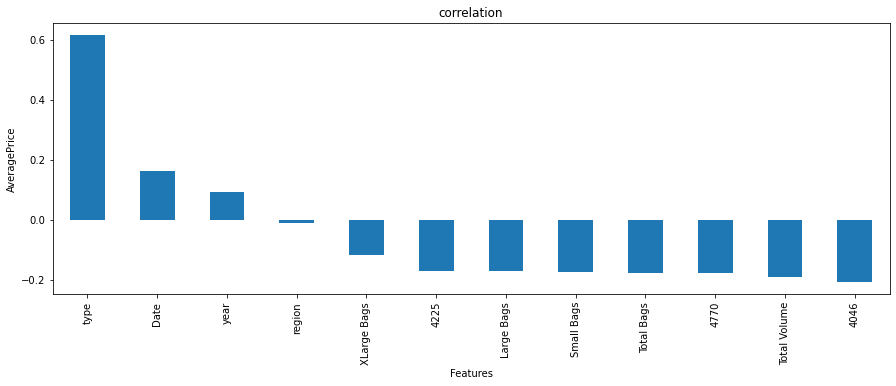

In [37]:
#plotting a coorelation plot that will show relation of features with label(region)

plt.figure(figsize=(15,5))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('AveragePrice')
plt.title('correlation')
plt.show()

Observation:
- The above correlation with the label shows that avocado is highest positively related to Average Price of Avocado.
- Least positively related to Avg. price is region.
- The PLU code 4046 type avocadoes are highest negatively related to avg. price.

In [38]:
df.skew()

Date             0.106617
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [39]:
features=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [40]:
#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson')

In [41]:
df[features]=scaler.fit_transform(df[features])

In [42]:
df.skew()

Date            0.106617
AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.215339
region          0.000030
dtype: float64

# Removal of outliers using z-score method

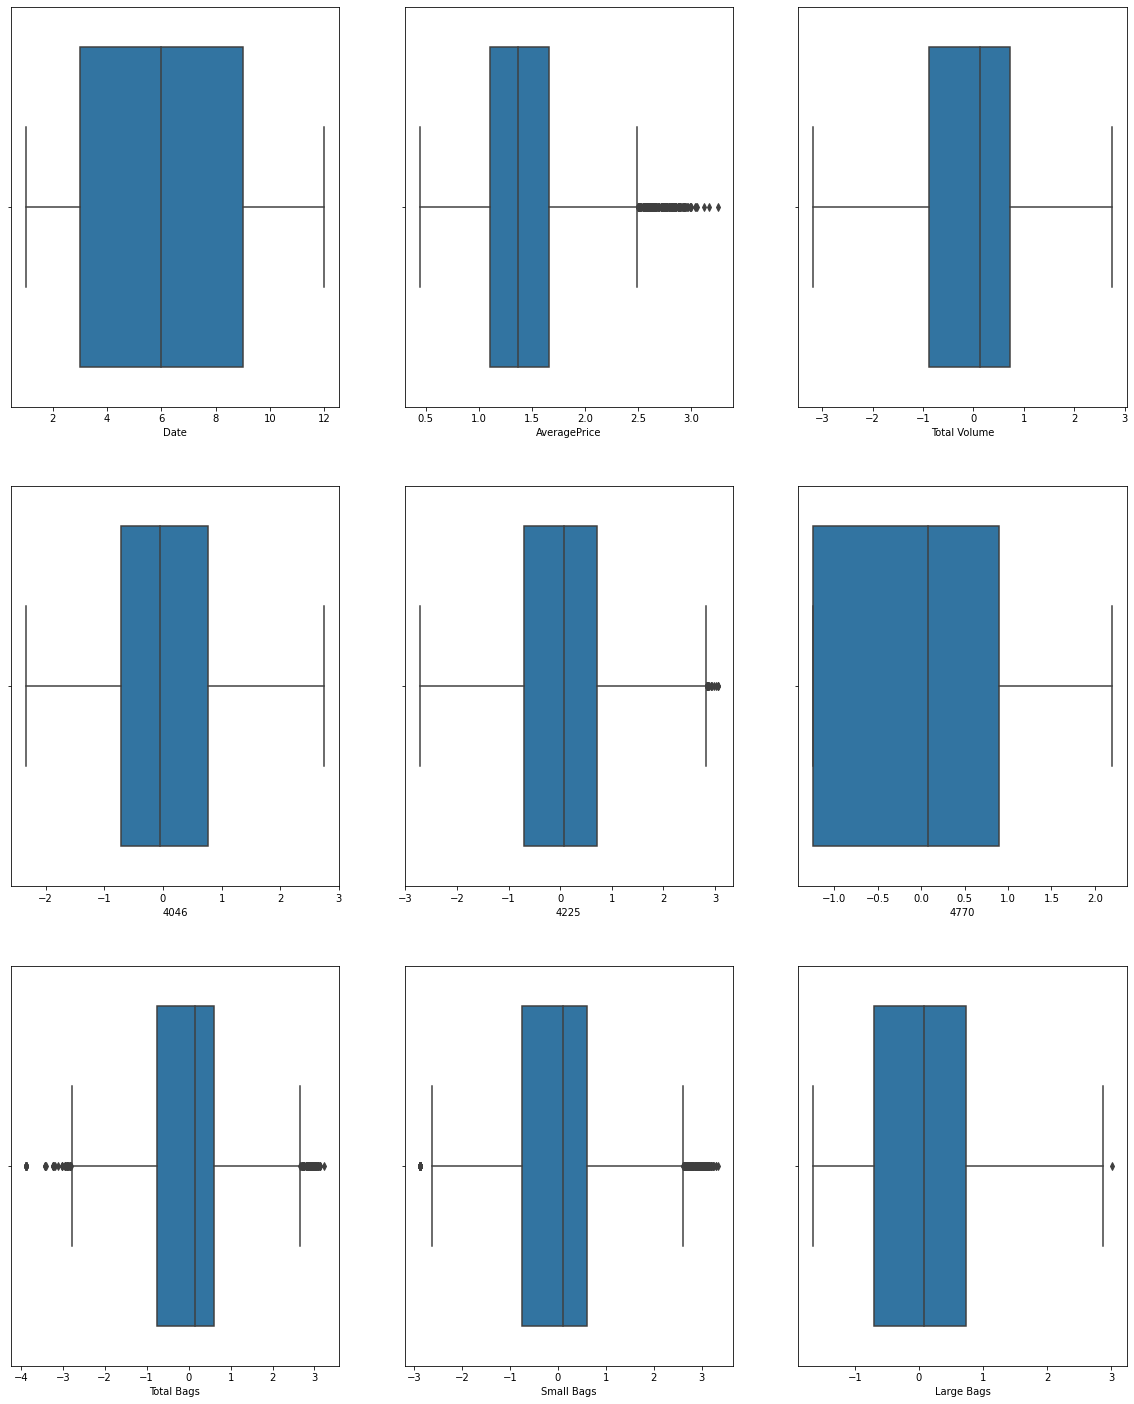

In [48]:
#plotting boxplots for dataset to check for outliers

plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [49]:
features=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [50]:
df.shape

(18249, 13)

In [52]:
#importing library
from scipy.stats import zscore

z_score=zscore(data[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])

In [53]:
abs_z_score=np.abs(z_score)

In [54]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [55]:
df=df[filtering_entry]

In [56]:
#shape of dataset after removing outliers
df.shape

(17782, 13)

# Data loss after removing outliers

In [57]:
# data loss percentage 
df_loss=((18249-17782)/18249)*100
print(f'data loss in percent after removing outliers is: {df_loss}%')

data loss in percent after removing outliers is: 2.55904433119623%


# Using Principal component Analysis (PCA) to know which features are important to understand dataset.

In [62]:
#seperating features and label

X=df.drop(['AveragePrice'],axis=1)
Y=df['AveragePrice']

In [63]:
#importing libraries for PCA and standard scaler

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
#saving in variable

pca=PCA()

In [65]:
#scaling features

x_scaled=scaler.fit_transform(X)

In [66]:
#fit and transforming features to PCA

pca.fit_transform(x_scaled)

array([[-6.54837450e-01,  2.41908453e+00, -9.53539624e-01, ...,
        -3.78490291e-02,  6.56126946e-02, -1.35694662e-13],
       [-7.05916286e-01,  2.43323730e+00, -9.54401364e-01, ...,
        -3.79440534e-02,  4.52049287e-02, -1.71206495e-13],
       [-4.00392015e-01,  2.44364527e+00, -9.38750543e-01, ...,
         3.56388291e-02,  2.24013194e-01, -4.32707770e-14],
       ...,
       [-1.61518032e+00, -1.84984978e+00,  1.25329721e+00, ...,
         2.71742478e-02, -5.46387031e-02,  8.31839739e-13],
       [-1.48825696e+00, -1.86454726e+00,  1.25534469e+00, ...,
         3.30245349e-02, -5.37837117e-02,  8.25115473e-13],
       [-1.54126994e+00, -1.89219627e+00,  1.24888001e+00, ...,
         5.53869182e-02, -7.33828893e-02,  7.91709528e-13]])

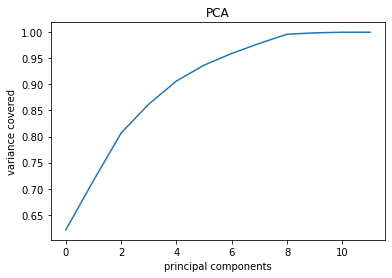

In [67]:
#plotting curve to see how many featutes are related

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

It can be seen at 9 features I am able to cover almost 100% of the data hence dropping remaining features will not matter much.

In [68]:
#selecting 9 features as the best ones in model building

pca=PCA(n_components=9)
new_comp=pca.fit_transform(x_scaled)


In [69]:
#creating a dataframe of new features

princi_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.654837,2.419085,-0.953540,-0.047762,0.942676,0.715689,0.115353,-0.305449,0.834349
1,-0.705916,2.433237,-0.954401,-0.045195,0.907486,0.690759,0.002526,-0.413819,0.795574
2,-0.400392,2.443645,-0.938751,-0.049787,1.060286,0.900582,-0.095090,-0.087113,0.890735
3,-0.631576,2.418911,-0.949384,-0.042371,0.911455,0.953520,0.121485,-0.145958,0.836640
4,-0.750721,2.366100,-0.745519,-0.053640,0.771809,0.926743,0.100473,-0.343003,0.718676
...,...,...,...,...,...,...,...,...,...
17777,-1.894887,-1.946335,0.827954,0.016952,-0.062713,-0.764857,0.088327,-0.218351,0.172103
17778,-2.024460,-1.992074,1.240114,0.140562,-0.072207,-0.589781,-0.048225,-0.035382,0.347188
17779,-1.615180,-1.849850,1.253297,0.743732,0.448395,-0.003270,-0.801282,-0.104183,-0.773050
17780,-1.488257,-1.864547,1.255345,0.693263,0.481771,-0.044093,-0.776143,-0.074381,-0.761529


# Model Buiding part

In [58]:
#importing library for regression model
from sklearn.ensemble import RandomForestRegressor

#importing r2 score
from sklearn.metrics import r2_score

#importing train test split
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [213]:
rf=RandomForestRegressor()

In [214]:
#finding best random state for linear regression model
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_train)
    pred=rf.predict(x_test)
    print('training score is ',(metrics.r2_score(y_train,y_pred)*100),' for random state ',i)
    print('testing score is ',(metrics.r2_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training score is  98.42410086428926  for random state  0
testing score is  88.29556872949806  for random state  0


training score is  98.41897645471555  for random state  1
testing score is  89.40473796706098  for random state  1


training score is  98.48787243277019  for random state  2
testing score is  88.59767879634192  for random state  2


training score is  98.43639674144016  for random state  3
testing score is  89.18033970913113  for random state  3


training score is  98.42572578772779  for random state  4
testing score is  88.63717072399893  for random state  4


training score is  98.41672371852763  for random state  5
testing score is  88.67095735918068  for random state  5


training score is  98.43005692316498  for random state  6
testing score is  89.3931423185135  for random state  6


training score is  98.4401966117628  for random state  7
testing score is  89.11146812002822  for random state  7


training score is  98.44788240192858  for random state  8
testing 

In [215]:
#making train and test data split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25,random_state=35)

In [216]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [217]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=rf.predict(x_train) 

pred=rf.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:98.43%
testing R2 score:88.73%


# finding cross validation score

In [72]:
#importing library for cross validation score
from sklearn.model_selection import cross_val_score

In [221]:
#finding best value for cv in provided range
for i in range(11,20):
    cv_score=cross_val_score(rf,x_scaled,Y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 11
cross validation score:-  41.833049525045375
At cv:- 12
cross validation score:-  40.59723695596144
At cv:- 13
cross validation score:-  44.70519991962112
At cv:- 14
cross validation score:-  42.1004674270439
At cv:- 15
cross validation score:-  44.76511504306504
At cv:- 16
cross validation score:-  39.971127156252386
At cv:- 17
cross validation score:-  46.292816530929166
At cv:- 18
cross validation score:-  42.23075014027079
At cv:- 19
cross validation score:-  46.36105888806007


In [223]:
#cross validation score
print('Cross Validation Score for Random Forest regressor model :- ',((cross_val_score(rf,x_scaled,Y,cv=19).mean())*100))

Cross Validation Score for Random Forest regressor model :-  46.24139208099338


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [225]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 0.09357931185623493
root mean squared error 0.1350060717784581


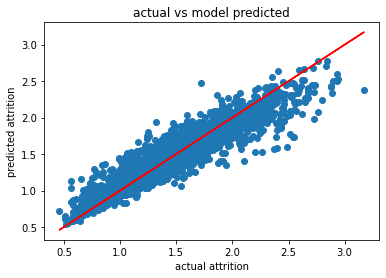

In [226]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual avg price')
plt.ylabel('predicted avg price')
plt.title('actual vs model predicted')
plt.show()

In [92]:
#importing libraries for ,Decision Tree and Xgboost regressor

from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

In [118]:
#saving models in variables
xgb=xgb.XGBRegressor()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()

# XGB Model

In [77]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25,random_state=35)

#training the model
xgb.fit(x_train,y_train)

#predicting model on train and test data
y_pred_xgb=xgb.predict(x_train)
pred_xgb=xgb.predict(x_test)


print(f'Training R2 score for XGB regressor model:{r2_score(y_train,y_pred_xgb)*100:.2f}%')
print(f'Testing R2 score for XGB regressor model:{r2_score(y_test,pred_xgb)*100:.2f}%')

Training R2 score for XGB regressor model:96.08%
Testing R2 score for XGB regressor model:88.84%


In [74]:
#cross validation score
print('Cross Validation Score for XGB regressor model :- ',((cross_val_score(xgb,x_scaled,Y,cv=19).mean())*100))

Cross Validation Score for XGB regressor model :-  60.12745218583443


In [76]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_xgb))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_xgb)))

mean absolute error 0.09636487810717903
root mean squared error 0.1347382894222482


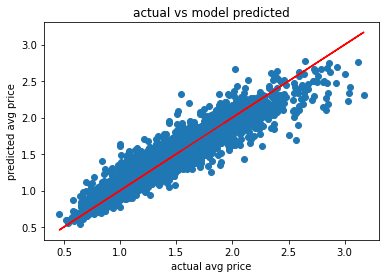

In [102]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred_xgb)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual avg price')
plt.ylabel('predicted avg price')
plt.title('actual vs model predicted')
plt.show()

# K Neighbours Model

In [78]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25,random_state=35)

#training the model
knn.fit(x_train,y_train)

#predicting model on train and test data
y_pred_knn=knn.predict(x_train)
pred_knn=knn.predict(x_test)


print(f'Training R2 score for K neighbours regressor model:{r2_score(y_train,y_pred_knn)*100:.2f}%')
print(f'Testing R2 score for K neighbours regressor model:{r2_score(y_test,pred_knn)*100:.2f}%')

Training R2 score for K neighbours regressor model:89.82%
Testing R2 score for K neighbours regressor model:82.31%


In [79]:
#cross validation score
print('Cross Validation Score for XGB regressor model :- ',((cross_val_score(knn,x_scaled,Y,cv=19).mean())*100))

Cross Validation Score for XGB regressor model :-  -28.652546548139163


In [80]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_knn))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_knn)))

mean absolute error 0.11649527665317139
root mean squared error 0.16963626775495785


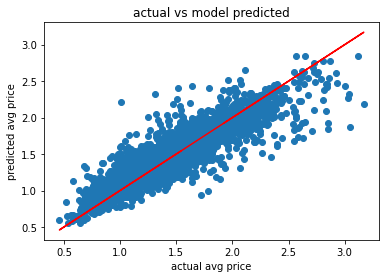

In [103]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred_knn)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual avg price')
plt.ylabel('predicted avg price')
plt.title('actual vs model predicted')
plt.show()

# Decision Tree Model

In [82]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25,random_state=35)

#training the model
dt.fit(x_train,y_train)

#predicting model on train and test data
y_pred_dt=dt.predict(x_train)
pred_dt=dt.predict(x_test)


print(f'Training R2 score for Decision Tree regressor model:{r2_score(y_train,y_pred_dt)*100:.2f}%')
print(f'Testing R2 score for Decision Tree regressor model:{r2_score(y_test,pred_dt)*100:.2f}%')

Training R2 score for Decision Tree regressor model:100.00%
Testing R2 score for Decision Tree regressor model:64.33%


In [84]:
#cross validation score
print('Cross Validation Score for Decision Tree regressor model :- ',((cross_val_score(dt,x_scaled,Y,cv=19).mean())*100))

Cross Validation Score for Decision Tree regressor model :-  -56.61223419998455


In [85]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_dt))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_dt)))

mean absolute error 0.1545051731893837
root mean squared error 0.24086312966800938


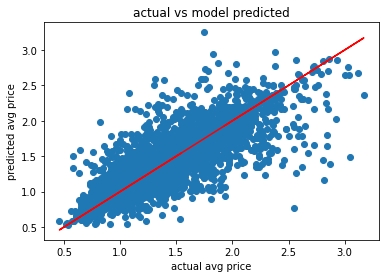

In [104]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred_dt)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual avg price')
plt.ylabel('predicted avg price')
plt.title('actual vs model predicted')
plt.show()

# the following dataframe shows the training, testing and cross validation scores of different regression models

In [87]:
column=pd.DataFrame({'Model':['Random Forest','XGB','KNeighbors','Decision Tree'],
                    'Training scores':[98.43,96.08,89.82,100],
                    'Testing scores':[88.73,88.84,82.31,64.33],
                    'Cross validation score':[46.24,60.12,-28.65,-56],
                    'RMSE':[0.135,0.134,0.16,0.24]})
column

,Model,Training scores,Testing scores,Cross validation score,RMSE
0,Random Forest,98.43,88.73,46.24,0.135
1,XGB,96.08,88.84,60.12,0.134
2,KNeighbors,89.82,82.31,-28.65,0.160
3,Decision Tree,100.00,64.33,-56.00,0.240


# Selecting best model
- **From above dataframe it can be seen that though Random forest has seen most of the data then XGB by approx.2%. XGB gives better testing score.**
- **Also the cross validation score for XGB is higher than Random Forest and also the RMSE score is lower for XGB then Random Forest.**

# By looking at above points, I will select XGB regressor model as the best model for hyperparameter tuning.

In [88]:
# Hyperparameter tuning for XGB regression model

#importing library for grid search cv

from sklearn.model_selection import GridSearchCV

In [93]:
xgb1=xgb.XGBRegressor()

In [94]:
#setting parameters for tuning
grid_param={'n_estimators':[2,3,4,5],
           'max_depth':[1,2,3,4,5],
            'max_leaves':[3,4,5,6],
            'booster':['gbtree', 'gblinear','dart']}

In [95]:
#saving model into variable 
grid=GridSearchCV(xgb1,param_grid=grid_param)

In [96]:
#training the model to find best parameters
grid.fit(x_train,y_train)

[12:41:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[12:41:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[12:41:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[12:41:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[12:41:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.c

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_leaves': [3, 4, 5, 6],
                         'n_estimators': [2, 3, 4, 5]})

In [97]:
#printing best parameters
best_parameters=grid.best_params_
print(best_parameters)

{'booster': 'dart', 'max_depth': 5, 'max_leaves': 3, 'n_estimators': 5}


In [98]:
#using best parameters fetched into XGB model and using it on train data

xgb1=xgb.XGBRegressor(booster='dart',
                          max_depth=5, 
                          max_leaves= 3,  
                          n_estimators= 5)
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='dart', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [99]:
#predicting model on train and test data
y_pred_xgb1=xgb1.predict(x_train)
pred_xgb1=xgb1.predict(x_test)


print(f'Training R2 score for XGB model regressor model:{r2_score(y_train,y_pred_xgb1)*100:.2f}%')
print(f'Testing R2 score for XGB model regressor model:{r2_score(y_test,pred_xgb1)*100:.2f}%')

Training R2 score for XGB model regressor model:52.03%
Testing R2 score for XGB model regressor model:50.49%


In [100]:
#cross validation score for tuned model
cvs_xgb1=cross_val_score(xgb1,x_scaled,Y,cv=19).mean()
print('Cross Validation Score for XGB regressor model is- ',((cvs_xgb1)*100))

Cross Validation Score for XGB regressor model is-  4.97441945098744


In [101]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_xgb1))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_xgb1)))

mean absolute error 0.21129316815587781
root mean squared error 0.2837526992044625


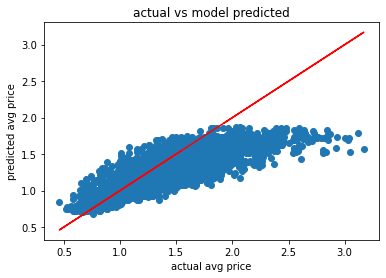

In [105]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred_xgb1)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual avg price')
plt.ylabel('predicted avg price')
plt.title('actual vs model predicted')
plt.show()

**It can be seen that tuned model does not give provide good accuracy as the original XGB regressor model, hence the original XGB model is best for machine learning, hence that model will be saved.**

# saving the model using pickle

In [113]:
import pickle

In [119]:
pickle.dump(xgb,open('avocad_price','wb'))